In [3]:
!pip install wandb -q
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

# Section 1: MLP Model Implementation & Experiment Tracking

### Installing the dependencies

In [14]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.2.2 which

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
# Loading and Preparing the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding the labels or y
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training (70%), validation (10%), and testing (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 of 80% is 10% of the total

# Normalizing features to [0,1] using StandardScaler of sklearn
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import wandb

In [2]:
# Defining the MLP Model
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(4,), name='hidden_layer'),
        Dense(3, activation='softmax', name='output_layer')
    ])

    model.compile(
        loss='categorical_crossentropy', # categorical crossentropy used for probs
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model


# Setting Up Experiment Tracking with W&B
def init_wandb():
    wandb.init(
        project="iris-mlp",
        config={
            "architecture": "MLP",
            "dataset": "Iris",
            "input_neurons": 4,
            "hidden_neurons": 16,
            "output_neurons": 3,
            "hidden_activation": "ReLU",
            "output_activation": "Softmax",
            "loss_function": "categorical_crossentropy",
            "optimizer": "Adam",
            "learning_rate": 0.001,
            "batch_size": 32,
            "epochs": 50
        }
    )
    return wandb

In [3]:
# Custom callback to log training and validation metrics to W&B
class WandbMetricsLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        wandb.log({
            "train_loss": logs.get("loss"),
            "train_accuracy": logs.get("accuracy"),
            "val_loss": logs.get("val_loss"),
            "val_accuracy": logs.get("val_accuracy")
        })

# Running the experiment calling th main function
wb = init_wandb()

# Creating the model
model = create_model()

# Logging model summary
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
model_summary = "\n".join(stringlist)
wb.summary["model_summary"] = model_summary
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)
wandb.log({"model_architecture": wandb.Image("model_architecture.png")})

# Defining callbacks
wandb_logger = WandbMetricsLogger()

wandb: Currently logged in as: 23110148 (23110148-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [7]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[wandb_logger],
    verbose=1
)

# Evaluating Model Performance
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Logging final metrics to W&B
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1_score": f1
})

Epoch 1/50
4/4 [==============================] - 1s 92ms/step - loss: 1.2346 - accuracy: 0.2762 - val_loss: 1.1349 - val_accuracy: 0.4667
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.2009 - accuracy: 0.3238 - val_loss: 1.1142 - val_accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 1.1666 - accuracy: 0.4000 - val_loss: 1.0926 - val_accuracy: 0.4000
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1351 - accuracy: 0.4476 - val_loss: 1.0720 - val_accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1035 - accuracy: 0.4857 - val_loss: 1.0522 - val_accuracy: 0.4667
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0728 - accuracy: 0.5048 - val_loss: 1.0333 - val_accuracy: 0.5333
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0442 - accuracy: 0.5048 - val_loss: 1.0156 - val_accuracy: 0.5333
Epoch 8/50
4/4 [===========

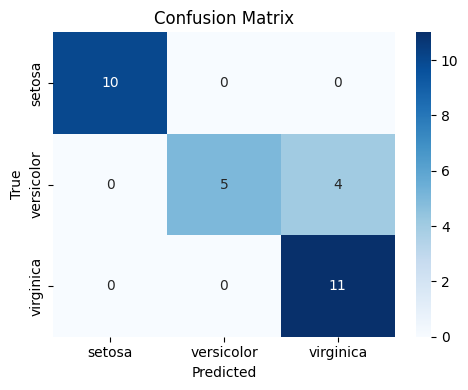

In [8]:
# Plotting and logging confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.savefig('confusion_matrix.png')

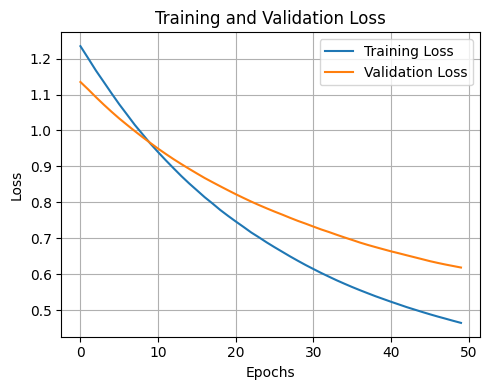

In [9]:
# Plotting and logging loss curves
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
wandb.log({"loss_curves": wandb.Image(plt)})
plt.savefig('loss_curves.png')

In [10]:
# Printing results
print("Test Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Metrics:
Accuracy: 0.8667
Precision: 0.9022
Recall: 0.8667
F1 Score: 0.8579


In [11]:
# Finishing W&B run
wandb.finish()

test_accuracy,▁
test_f1_score,▁
test_precision,▁
test_recall,▁
train_accuracy,▁▂▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██████████████████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_accuracy,▂▁▁▁▂▅▅▅▅▅▄▄▄▄▄▅▅▅▅▇▇▇▇▇▇▇▇█████████▇▇▅▅
val_loss,██▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
model_summary,"Model: ""sequential""..."
test_accuracy,0.86667
test_f1_score,0.85788


# Section 2: Hyperparameters

### Importing the dependencies

In [12]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

import autogluon
from autogluon.core.models import AbstractModel
from autogluon.features.generators import LabelEncoderFeatureGenerator
from autogluon.common import space
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Manual Tuning

In [13]:
# Hyperparameters to work on
epochs = [1, 3, 5]
lrs = [1e-3, 1e-5]
batch_sizes = [2, 4]

In [14]:
# Function for plotting the loss curves
def plot_losses(train_losses, val_losses, epoch, lr, batch_size):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, epoch + 1), train_losses, label='Training Loss', color='blue')
    plt.scatter(range(1, epoch + 1), val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss - Epoch: {epoch}, LR: {lr}, Batch Size: {batch_size}')
    plt.legend()
    plt.show()

In [15]:
# Utility for plotting the confusion matrix
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 2/[1, 3, 5] - Train Loss: 0.9307, Val Loss: 0.8789


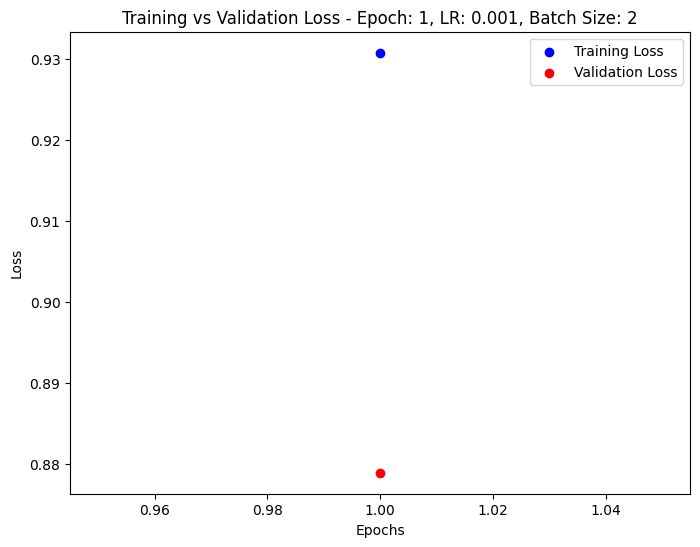

1/1 [==============================] - 0s 148ms/step


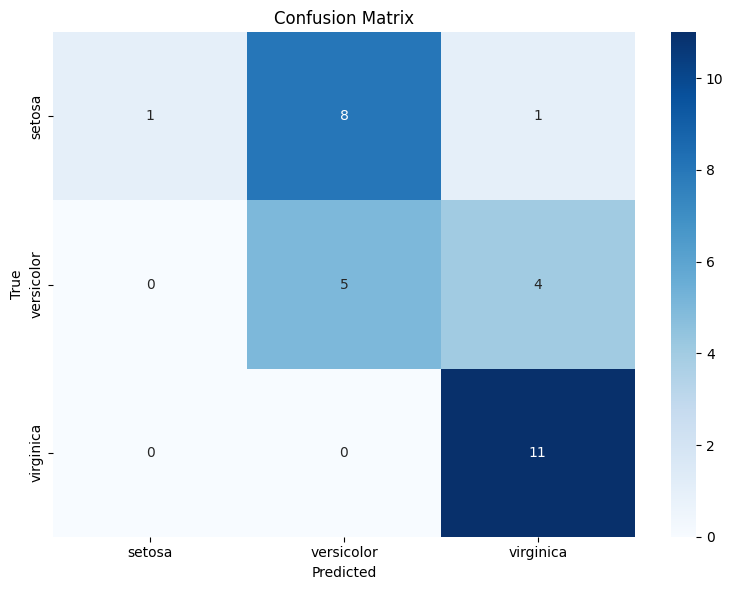

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 2/[1, 3, 5] - Train Loss: 1.0656, Val Loss: 1.0048


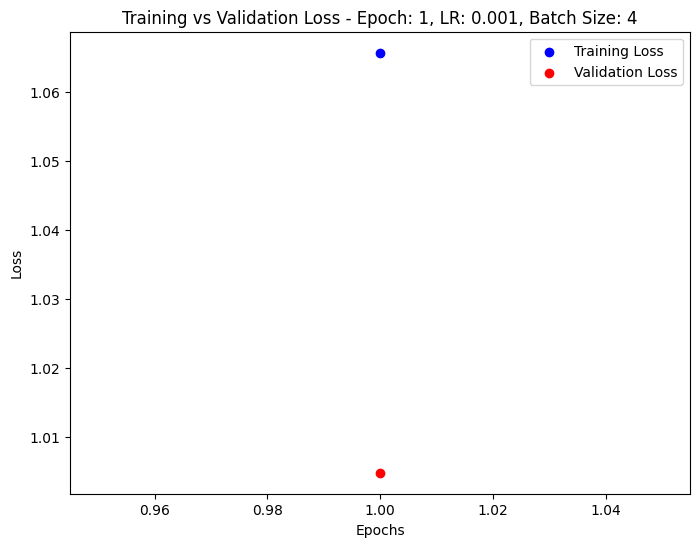

1/1 [==============================] - 0s 71ms/step


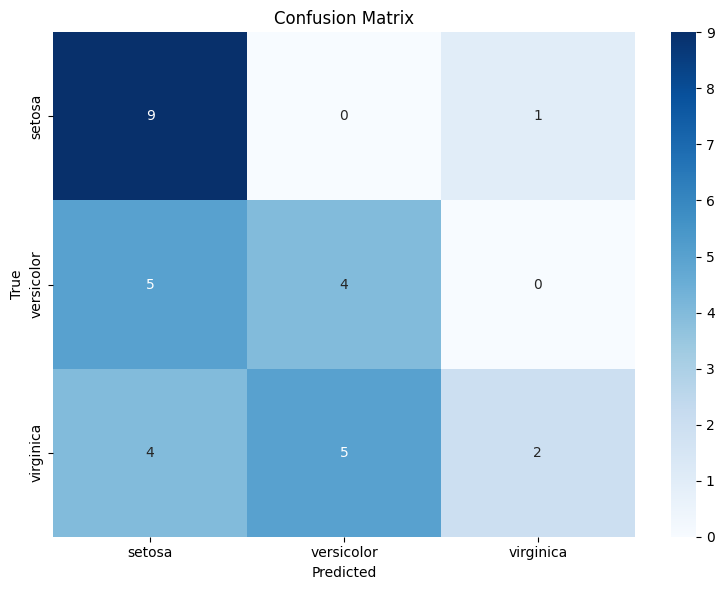

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 2/[1, 3, 5] - Train Loss: 1.4913, Val Loss: 1.2736


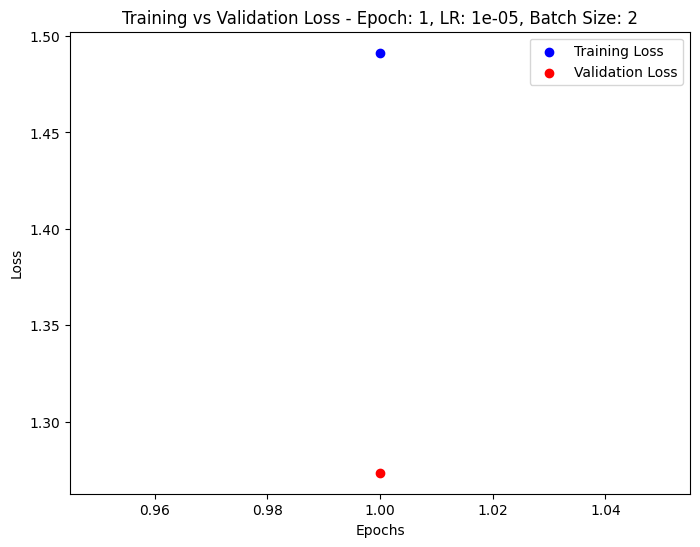

1/1 [==============================] - 0s 47ms/step


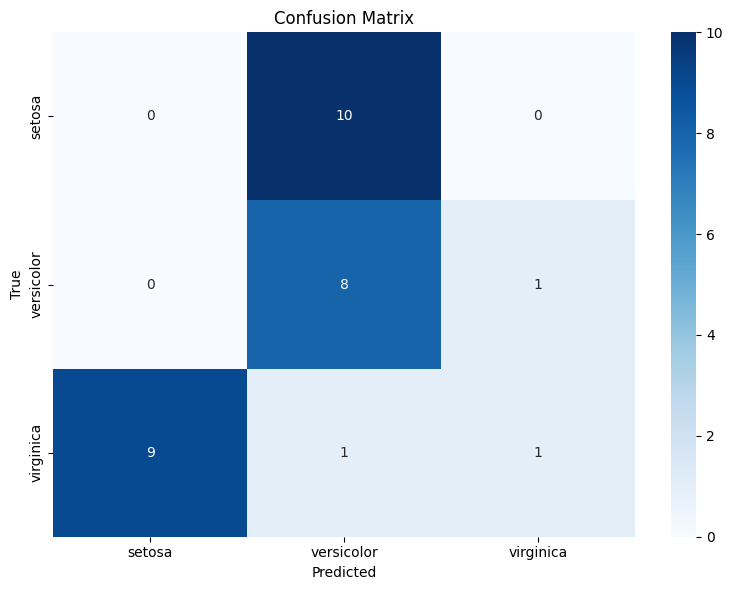

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 2/[1, 3, 5] - Train Loss: 1.3182, Val Loss: 1.1700


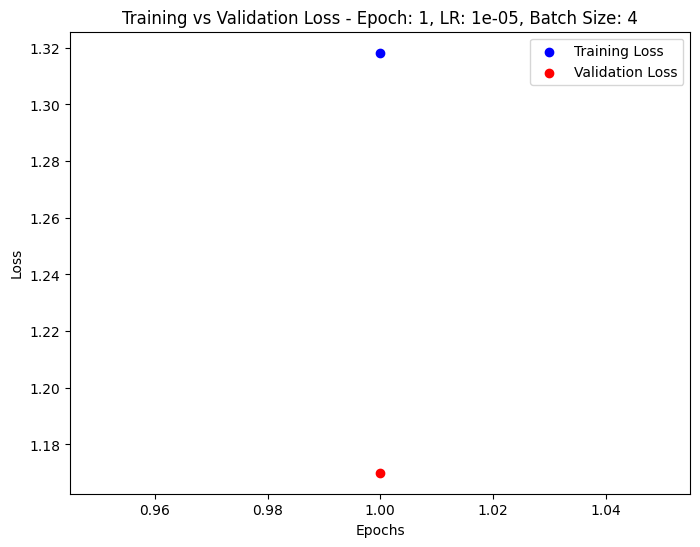

1/1 [==============================] - 0s 47ms/step


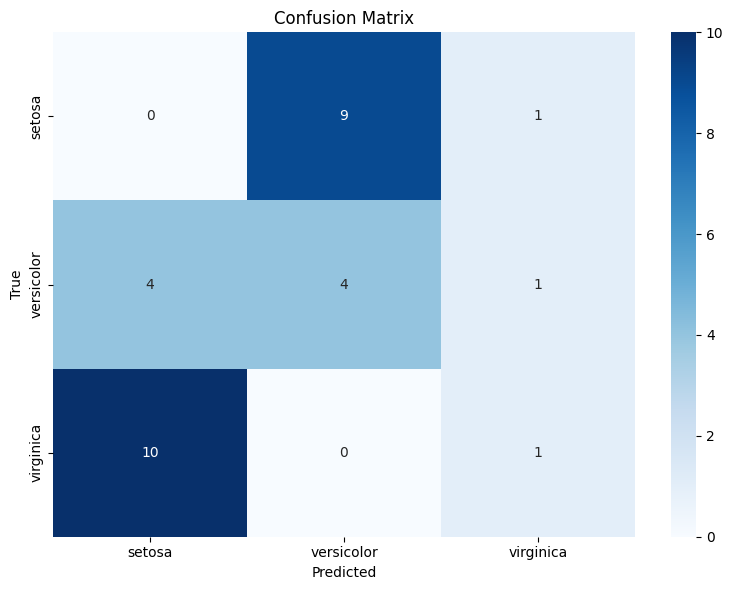

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 4/[1, 3, 5] - Train Loss: 1.1392, Val Loss: 1.0183
Epoch 4/[1, 3, 5] - Train Loss: 0.8595, Val Loss: 0.8674
Epoch 4/[1, 3, 5] - Train Loss: 0.6819, Val Loss: 0.7708


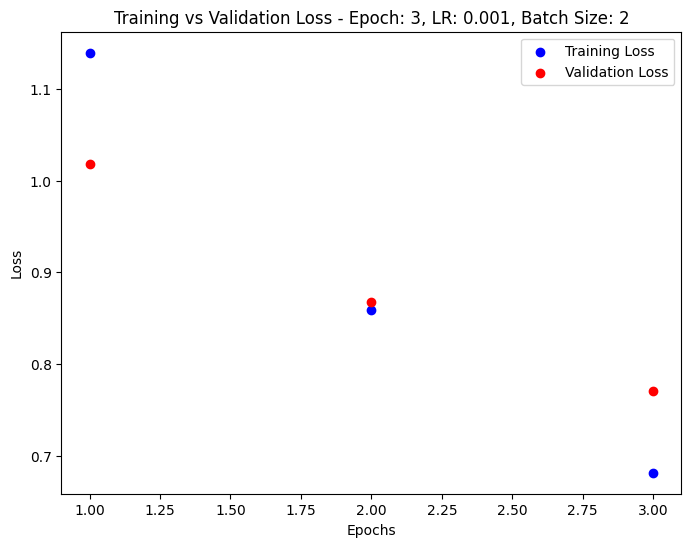

1/1 [==============================] - 0s 57ms/step


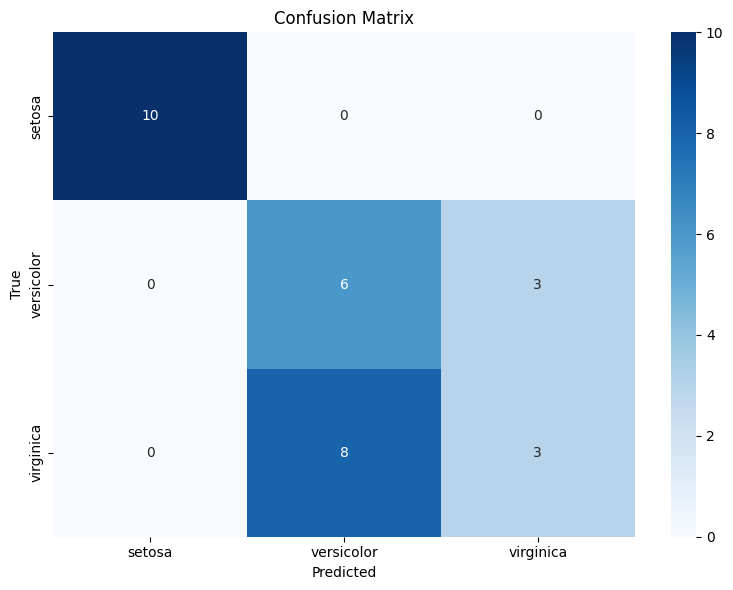

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 4/[1, 3, 5] - Train Loss: 1.1591, Val Loss: 1.1671
Epoch 4/[1, 3, 5] - Train Loss: 1.0079, Val Loss: 1.0657
Epoch 4/[1, 3, 5] - Train Loss: 0.8863, Val Loss: 0.9780


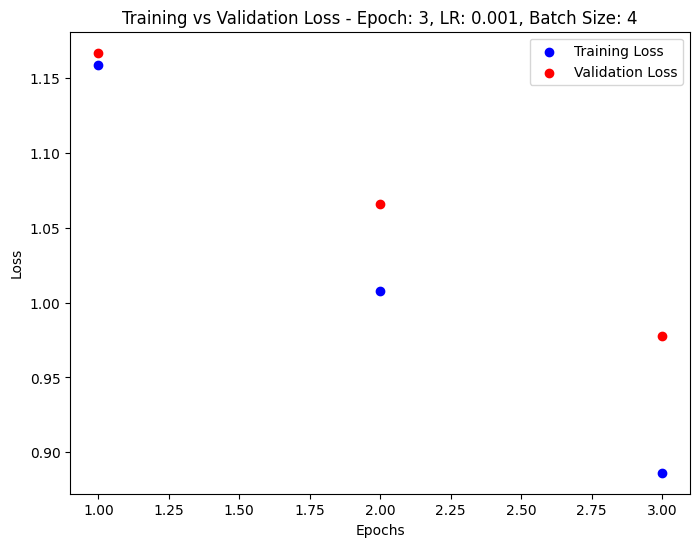

1/1 [==============================] - 0s 48ms/step


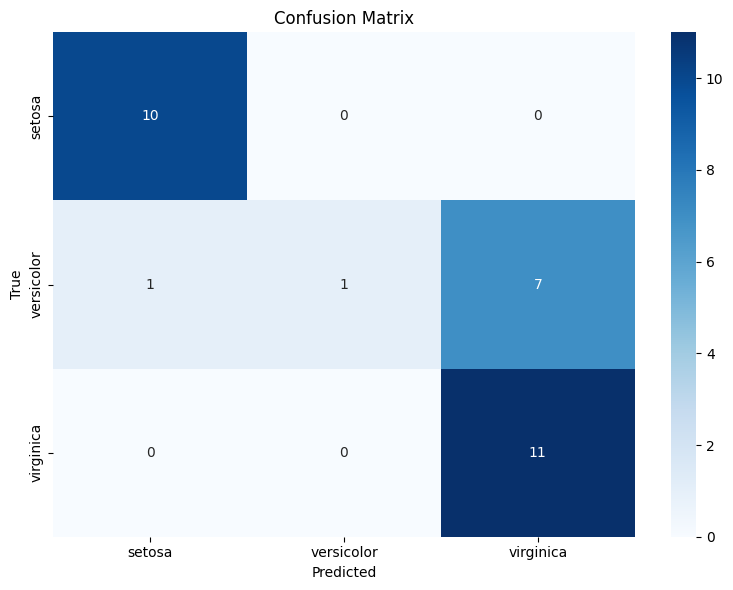

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 4/[1, 3, 5] - Train Loss: 1.2855, Val Loss: 1.0352
Epoch 4/[1, 3, 5] - Train Loss: 1.2829, Val Loss: 1.0339
Epoch 4/[1, 3, 5] - Train Loss: 1.2802, Val Loss: 1.0325


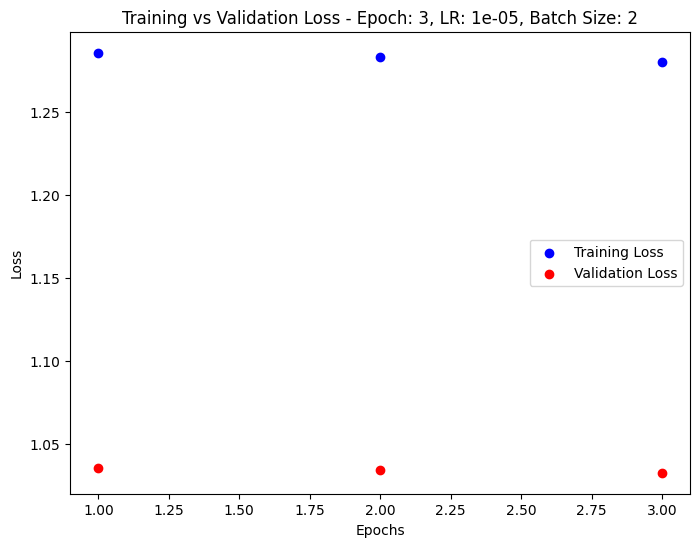

1/1 [==============================] - 0s 40ms/step


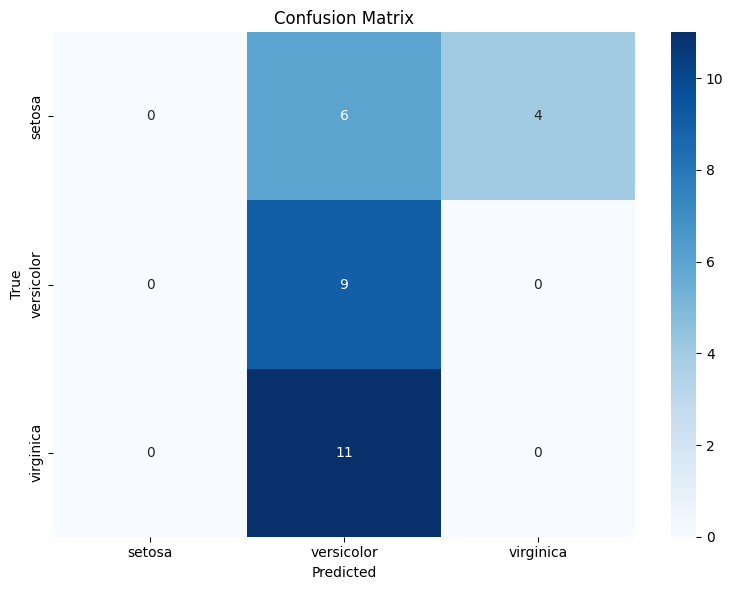

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 4/[1, 3, 5] - Train Loss: 1.0945, Val Loss: 1.0749
Epoch 4/[1, 3, 5] - Train Loss: 1.0930, Val Loss: 1.0741
Epoch 4/[1, 3, 5] - Train Loss: 1.0915, Val Loss: 1.0733


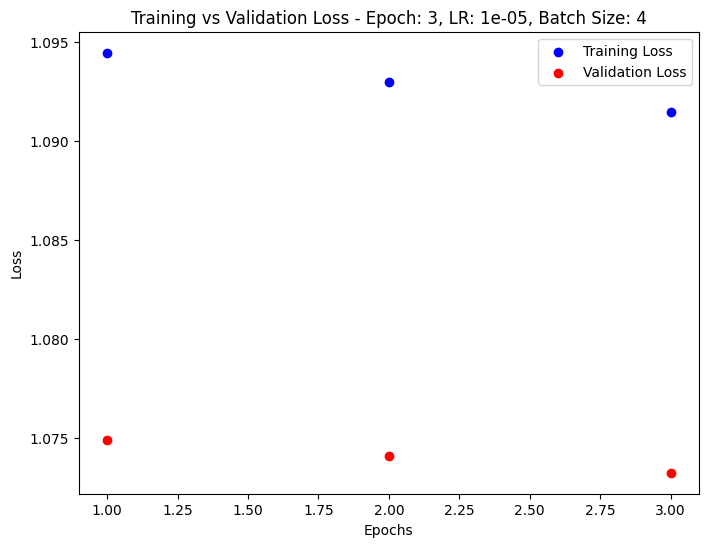

1/1 [==============================] - 0s 49ms/step


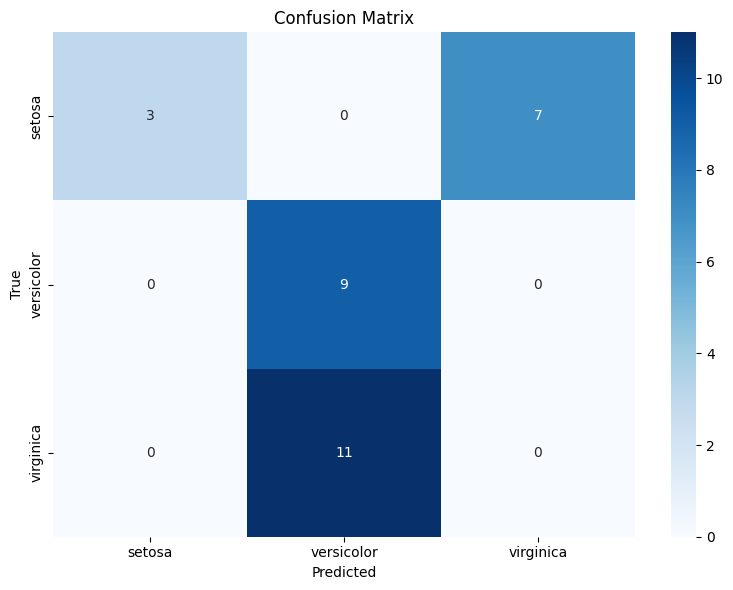

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 6/[1, 3, 5] - Train Loss: 0.9898, Val Loss: 1.0691
Epoch 6/[1, 3, 5] - Train Loss: 0.8219, Val Loss: 0.9677
Epoch 6/[1, 3, 5] - Train Loss: 0.7045, Val Loss: 0.8888
Epoch 6/[1, 3, 5] - Train Loss: 0.6099, Val Loss: 0.8092
Epoch 6/[1, 3, 5] - Train Loss: 0.5405, Val Loss: 0.7517


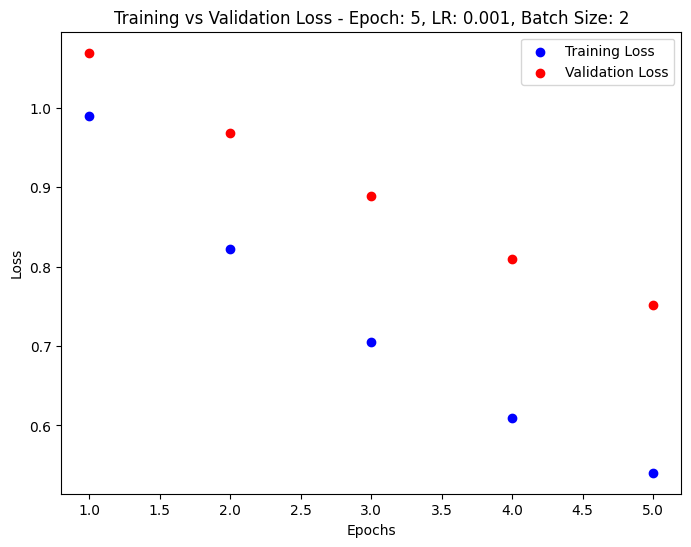

1/1 [==============================] - 0s 46ms/step


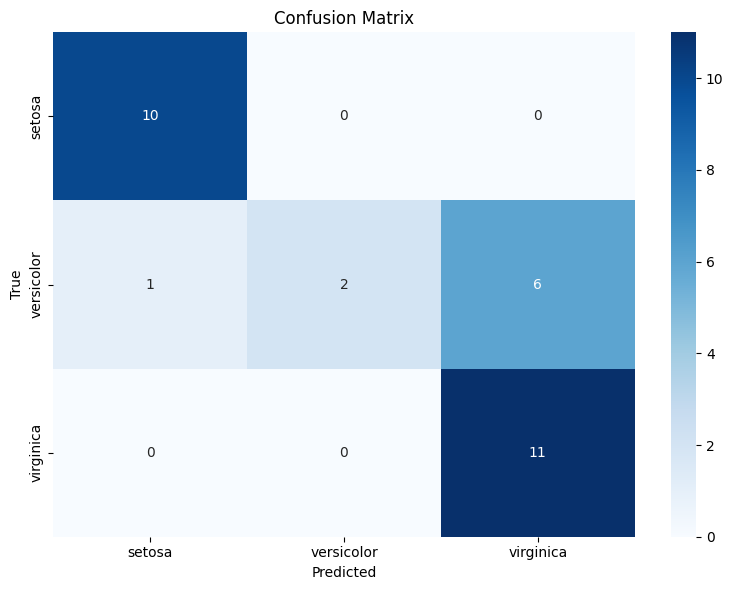

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 6/[1, 3, 5] - Train Loss: 0.8768, Val Loss: 0.9580
Epoch 6/[1, 3, 5] - Train Loss: 0.7568, Val Loss: 0.8670
Epoch 6/[1, 3, 5] - Train Loss: 0.6640, Val Loss: 0.8003
Epoch 6/[1, 3, 5] - Train Loss: 0.6016, Val Loss: 0.7517
Epoch 6/[1, 3, 5] - Train Loss: 0.5548, Val Loss: 0.7097


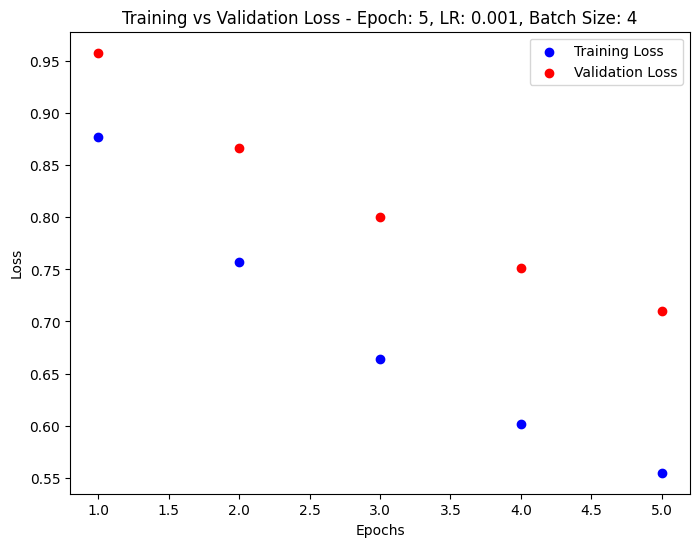

1/1 [==============================] - 0s 46ms/step


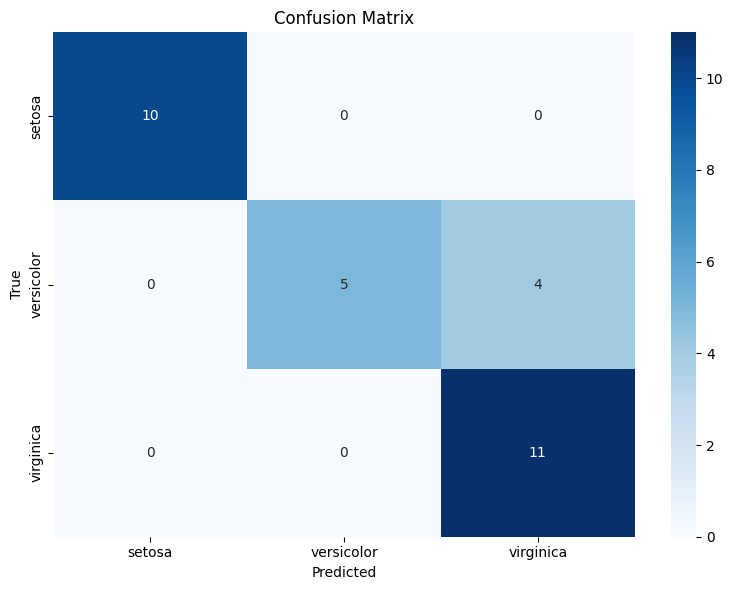

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 6/[1, 3, 5] - Train Loss: 1.1783, Val Loss: 1.2709
Epoch 6/[1, 3, 5] - Train Loss: 1.1754, Val Loss: 1.2687
Epoch 6/[1, 3, 5] - Train Loss: 1.1724, Val Loss: 1.2665
Epoch 6/[1, 3, 5] - Train Loss: 1.1695, Val Loss: 1.2643
Epoch 6/[1, 3, 5] - Train Loss: 1.1667, Val Loss: 1.2622


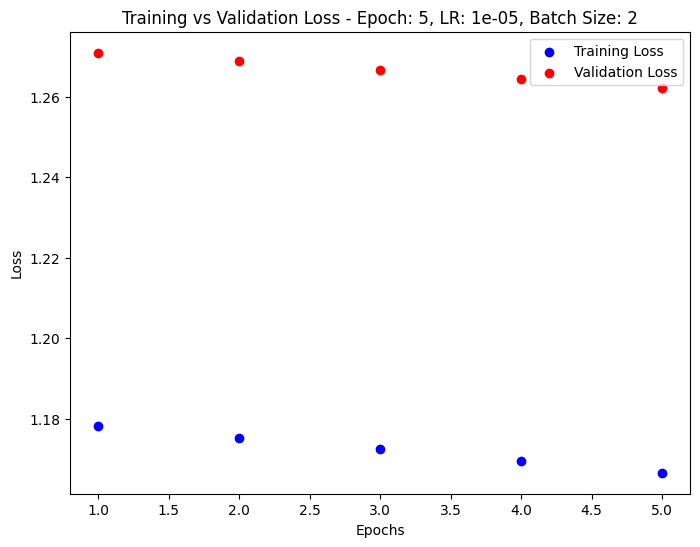

1/1 [==============================] - 0s 44ms/step


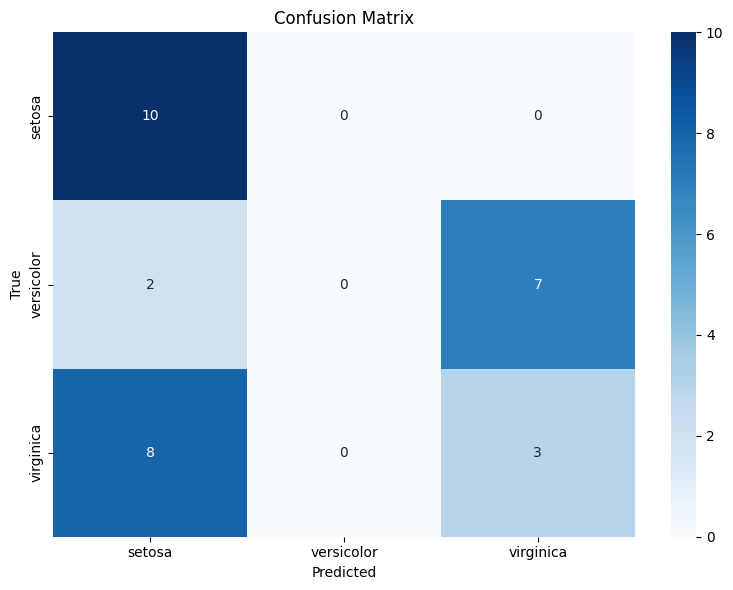

/usr/local/lib/python3.11/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 6/[1, 3, 5] - Train Loss: 1.4085, Val Loss: 1.4782
Epoch 6/[1, 3, 5] - Train Loss: 1.4064, Val Loss: 1.4765
Epoch 6/[1, 3, 5] - Train Loss: 1.4041, Val Loss: 1.4748
Epoch 6/[1, 3, 5] - Train Loss: 1.4019, Val Loss: 1.4731
Epoch 6/[1, 3, 5] - Train Loss: 1.3997, Val Loss: 1.4715


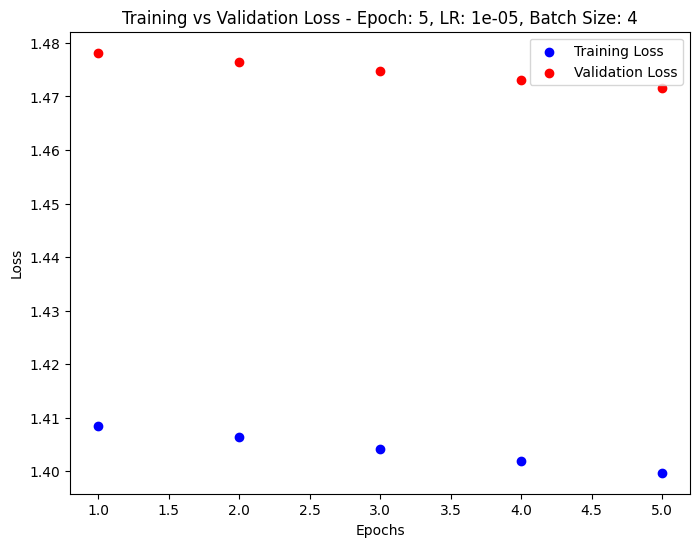

1/1 [==============================] - 0s 61ms/step


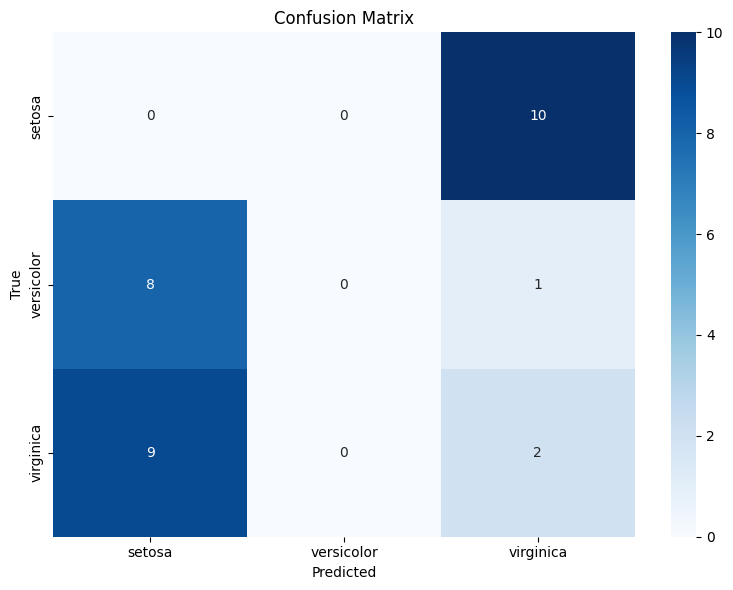

In [16]:
# Mannually searching over all hyperparamters combination (here 12)
for epoch in epochs:
    for lr in lrs:
        for batch_size in batch_sizes:
            train_losses = []
            val_losses = []
            model = create_model()
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
            if hasattr(X_train, "toarray"):
                X_train = X_train.toarray()
            if hasattr(y_train, "toarray"):
                y_train = y_train.toarray()

            y_train = np.array(y_train).astype(np.int32)
            y_val = np.array(y_val).astype(np.int32)

            train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(len(X_train))
            for e in range(epoch):
                running_loss = 0.0

                for batch_X, batch_y in train_dataset:
                    with tf.GradientTape() as tape:
                        logits = model(batch_X, training=True)
                        loss = tf.keras.losses.categorical_crossentropy(batch_y, logits, from_logits=False)
                        loss = tf.reduce_mean(loss)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    running_loss += loss.numpy()

                avg_train_loss = running_loss / len(train_dataset)
                train_losses.append(avg_train_loss)

                # Validation loss
                val_outputs = model(X_val, training=False)
                val_loss = tf.keras.losses.categorical_crossentropy(y_val, val_outputs, from_logits=True)
                val_loss = tf.reduce_mean(val_loss).numpy()
                val_losses.append(val_loss)

                print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

            plot_losses(train_losses, val_losses, epoch, lr, batch_size)
            plot_confusion_matrix(model)

## Automated Search

Importing searcher dependency from autogluon

In [17]:
import autogluon.core.searcher as ag_searcher

In [18]:
# Creating a Custom Class to use the custom model with AutoGluon
class CustomMLPClassifier(AbstractModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self._feature_generator = None
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


    def _preprocess(self, X: pd.DataFrame, is_train=False, **kwargs) -> np.ndarray:
        X = super()._preprocess(X, **kwargs)
        if is_train:
            self._feature_generator = LabelEncoderFeatureGenerator(verbosity=0)
            self._feature_generator.fit(X=X)
        if self._feature_generator is not None and self._feature_generator.features_in:
            X = X.copy()
            X[self._feature_generator.features_in] = self._feature_generator.transform(X=X)
        return X.fillna(0).to_numpy(dtype=np.float32)


    def _fit(self, X: pd.DataFrame, y: pd.Series, **kwargs):
        X = self.preprocess(X, is_train=True)
        params = self._get_model_params()
        print(f"Hyperparameters: {params}")

        # Splitting data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.13, random_state=42)

        input_dim = X.shape[1]
        hidden_dim = 16
        output_dim = 3

        self.model = create_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params.get('learning_rate', 0.001)),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

        X_train_tensor = np.array(X_train, dtype=np.float32)
        y_train_tensor = np.array(y_train.to_numpy(), dtype=np.int32)
        X_val_tensor = np.array(X_val, dtype=np.float32)
        y_val_tensor = np.array(y_val.to_numpy(), dtype=np.int32)

        epochs = params.get('epochs', 10)
        batch_size = params.get('batch_size', 32)

        train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor)).batch(batch_size).shuffle(len(X_train_tensor))

        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            running_loss = 0.0

            # Training loop
            for batch_X, batch_y in train_dataset:
                with tf.GradientTape() as tape:
                    logits = self.model(batch_X, training=True)
                    loss = tf.keras.losses.sparse_categorical_crossentropy(batch_y, logits, from_logits=True)
                    loss = tf.reduce_mean(loss)
                gradients = tape.gradient(loss, self.model.trainable_variables)
                self.model.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
                running_loss += loss.numpy()

            avg_train_loss = running_loss / len(train_dataset)
            train_losses.append(avg_train_loss)

            # Validation loss
            val_outputs = self.model(X_val_tensor, training=False)
            val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_val_tensor, val_outputs, from_logits=True)
            val_loss = tf.reduce_mean(val_loss).numpy()
            val_losses.append(val_loss)

            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Plot training vs validation loss
        plt.figure(figsize=(8, 6))
        plt.scatter(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
        plt.scatter(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training vs Validation Loss')
        plt.legend()
        plt.show()


    def _predict(self, X: pd.DataFrame, **kwargs):
        X = self.preprocess(X, is_train=False)
        X_array = np.array(X, dtype=np.float32)

        logits = self.model(X_array, training=False)
        predictions = np.argmax(logits, axis=1)

        return predictions


    def _predict_proba(self, X: pd.DataFrame, **kwargs):
        X = self.preprocess(X, is_train=False)
        X_array = np.array(X, dtype=np.float32)

        logits = self.model(X_array, training=False)
        probs = tf.nn.softmax(logits).numpy()

        return probs


    def _set_default_params(self):
        default_params = {
            'learning_rate': 0.001,
            'epochs': 10,
            'batch_size': 32
        }
        for param, val in default_params.items():
            self._set_default_param_value(param, val)


    def _get_default_auxiliary_params(self) -> dict:
        default_auxiliary_params = super()._get_default_auxiliary_params()
        extra_auxiliary_params = {'valid_raw_types': ['int', 'float', 'category']}
        default_auxiliary_params.update(extra_auxiliary_params)
        return default_auxiliary_params

In [19]:
# Defining the search space for hyperparameter
custom_hyperparameters = {
    CustomMLPClassifier: {
        'batch_size': space.Categorical(2, 4),
        'learning_rate': space.Categorical(1e-3, 1e-5),
        'epochs': space.Categorical(1, 3, 5)
    }
}

In [20]:
# Forming dataframe for training and testing as autogluon supports only dataframe for training
y_train_df = pd.DataFrame(np.ravel(y_train.argmax(axis=1)))
X_train_df = pd.DataFrame(X_train)
train_df = X_train_df.copy()
train_df['target'] = y_train_df

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(np.ravel(y_test.argmax(axis=1)))
test_df = X_test_df.copy()
test_df['target'] = y_test_df

### Grid Search

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.69 GB / 12.67 GB (76.4%)
Disk Space Avail:   74.41 GB / 112.64 GB (66.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 2}
Epoch 1/1 - Train Loss: 1.3195, Val Loss: 1.3066


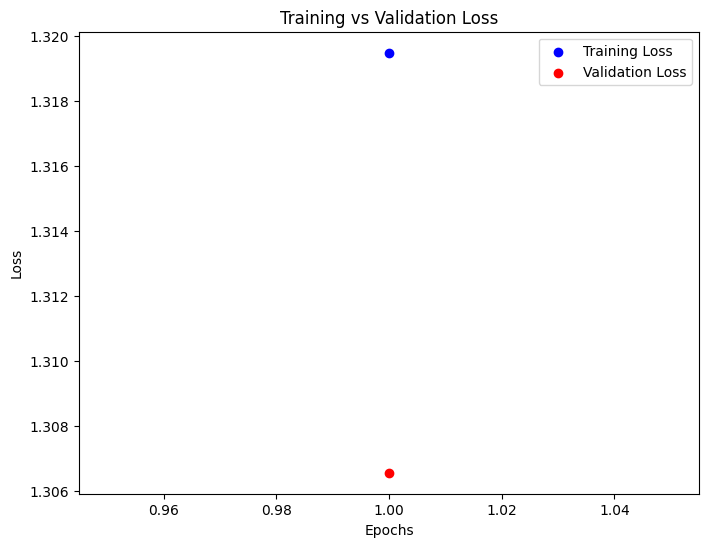

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.0873, Val Loss: 1.0077


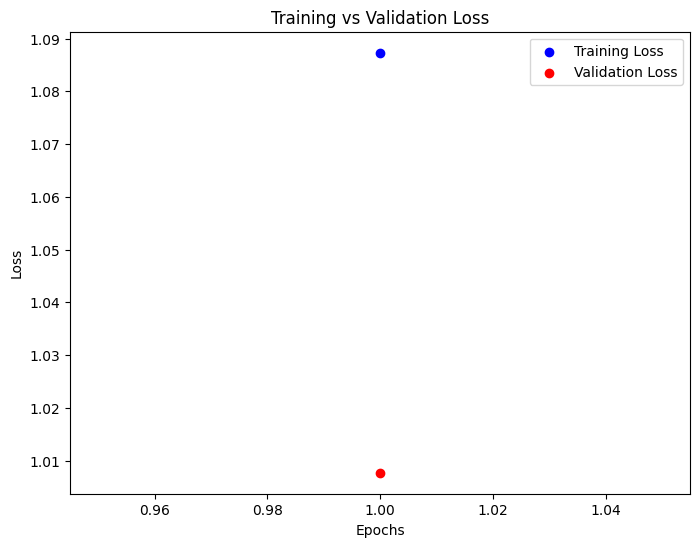

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.3252, Val Loss: 0.9923
Epoch 2/3 - Train Loss: 1.0925, Val Loss: 0.7620
Epoch 3/3 - Train Loss: 0.9071, Val Loss: 0.5859


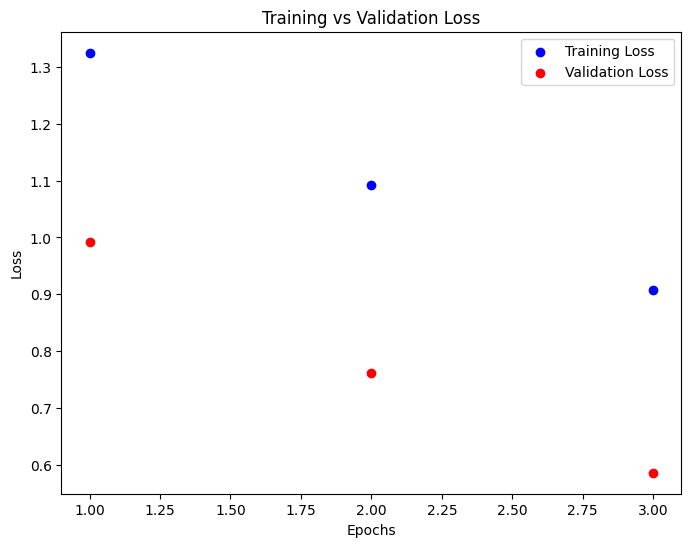

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.6043, Val Loss: 2.0697
Epoch 2/3 - Train Loss: 1.6020, Val Loss: 2.0659
Epoch 3/3 - Train Loss: 1.5998, Val Loss: 2.0621


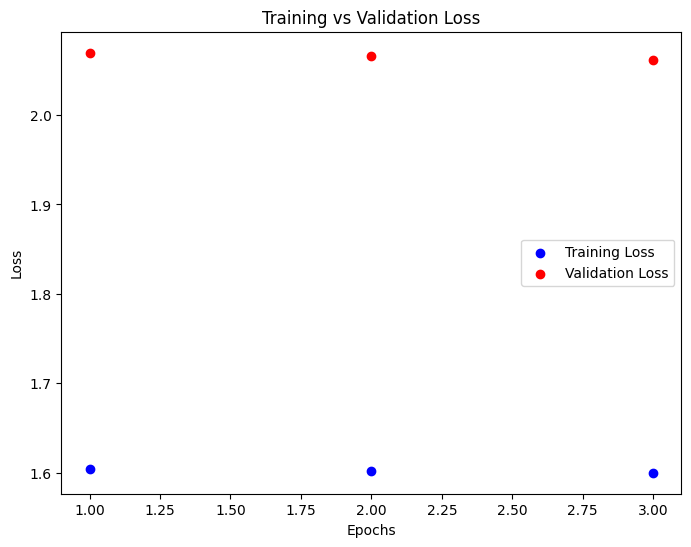

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.2133, Val Loss: 1.2127
Epoch 2/5 - Train Loss: 1.0581, Val Loss: 1.0176
Epoch 3/5 - Train Loss: 0.9308, Val Loss: 0.8623
Epoch 4/5 - Train Loss: 0.8221, Val Loss: 0.7375
Epoch 5/5 - Train Loss: 0.7308, Val Loss: 0.6286


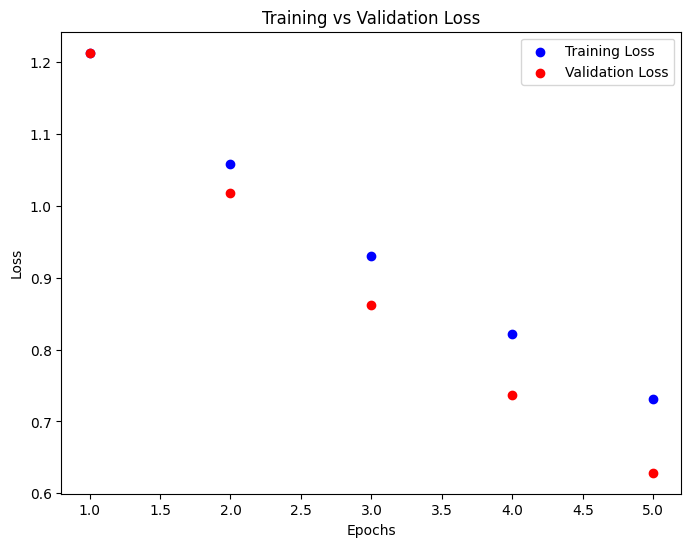

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.2422, Val Loss: 1.2825
Epoch 2/5 - Train Loss: 1.2395, Val Loss: 1.2787
Epoch 3/5 - Train Loss: 1.2367, Val Loss: 1.2751
Epoch 4/5 - Train Loss: 1.2340, Val Loss: 1.2714
Epoch 5/5 - Train Loss: 1.2312, Val Loss: 1.2679


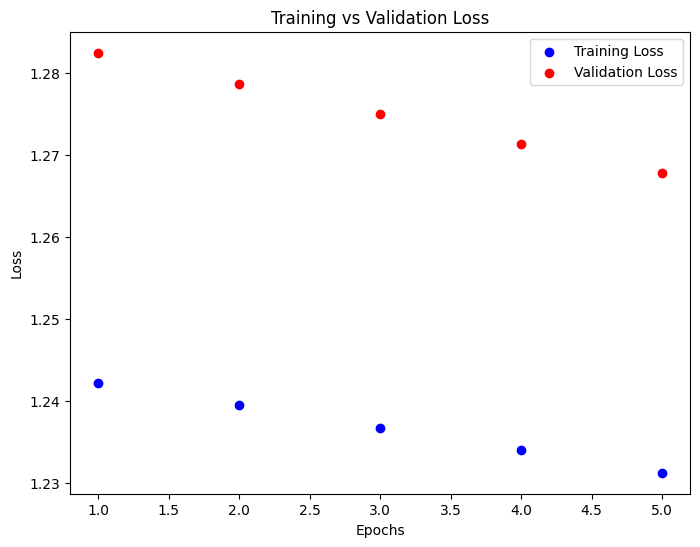

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.2893, Val Loss: 1.2481


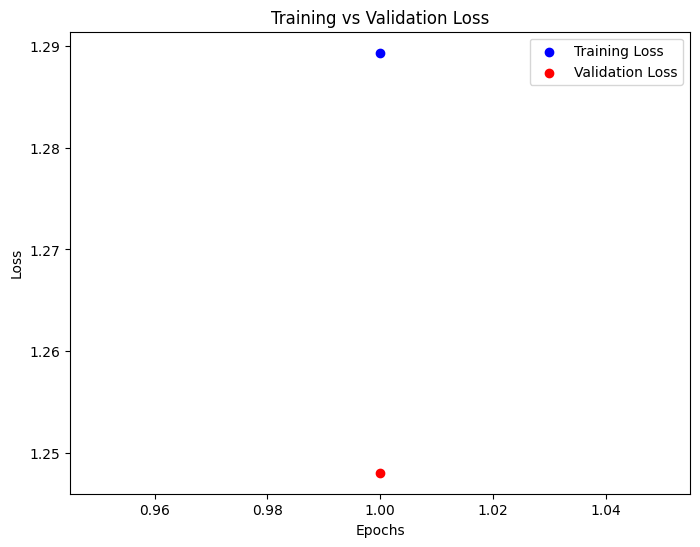

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.2655, Val Loss: 1.1380


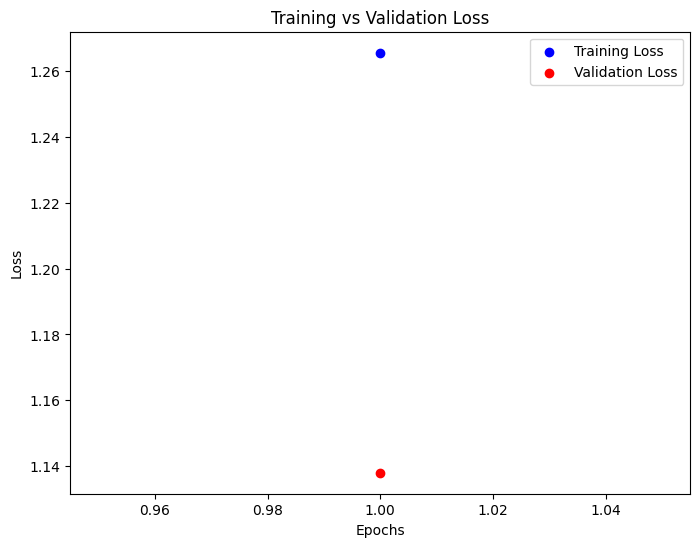

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.0690, Val Loss: 0.9482
Epoch 2/3 - Train Loss: 0.9935, Val Loss: 0.8523
Epoch 3/3 - Train Loss: 0.9234, Val Loss: 0.7680


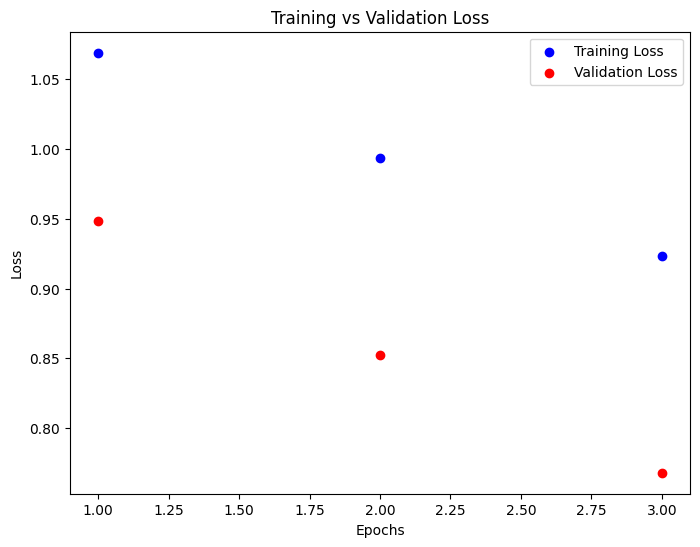

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.2547, Val Loss: 1.2686
Epoch 2/3 - Train Loss: 1.2537, Val Loss: 1.2672
Epoch 3/3 - Train Loss: 1.2526, Val Loss: 1.2659


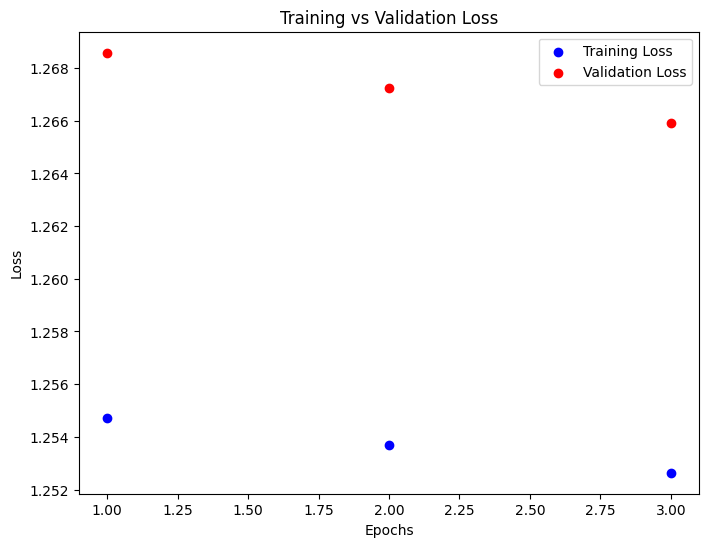

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1414, Val Loss: 1.0010
Epoch 2/5 - Train Loss: 1.0294, Val Loss: 0.8605
Epoch 3/5 - Train Loss: 0.9344, Val Loss: 0.7478
Epoch 4/5 - Train Loss: 0.8596, Val Loss: 0.6486
Epoch 5/5 - Train Loss: 0.7896, Val Loss: 0.5776


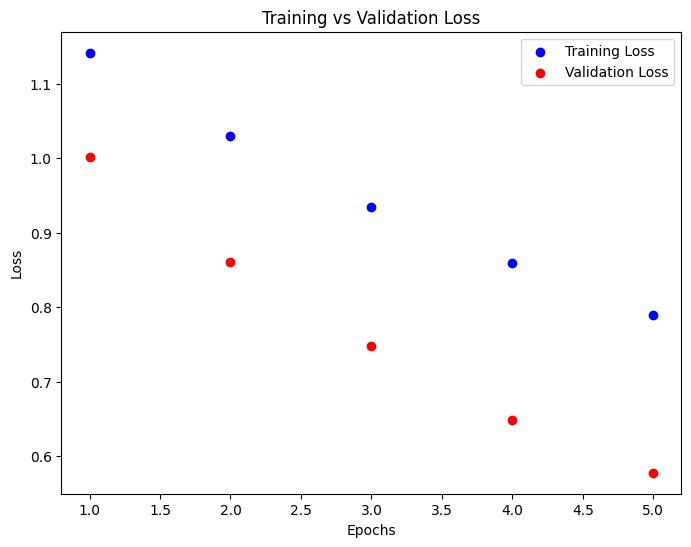

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.2637, Val Loss: 1.1623
Epoch 2/5 - Train Loss: 1.2622, Val Loss: 1.1604
Epoch 3/5 - Train Loss: 1.2607, Val Loss: 1.1585
Epoch 4/5 - Train Loss: 1.2592, Val Loss: 1.1567
Epoch 5/5 - Train Loss: 1.2578, Val Loss: 1.1547


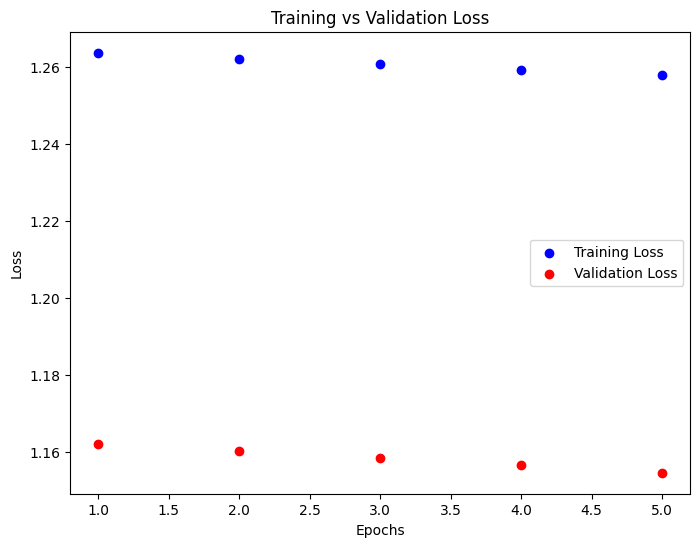

Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/scheduler/seq_scheduler.py", line 158, in run
    is_failed, result = self.run_trial(task_id=i)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/scheduler/seq_scheduler.py", line 254, in run_trial
    new_searcher_config = self.searcher.get_config()
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/searcher/local_grid_searcher.py", line 70, in get_config
    raise AssertionError(f"No configs left to get. All {self._grid_length} configs have been accessed already.")
AssertionError: No configs left to get. All 12 configs have been accessed already.
Fitted model: CustomMLPClassifier/T1 ...
	0.0	 = Validation score   (accuracy)
	1.98s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T2 ...
	0.3333	 = Validation 

In [31]:
grid_searcher_instance = ag_searcher.LocalGridSearcher(search_space=custom_hyperparameters[CustomMLPClassifier])

grid_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": grid_searcher_instance,
    "time_out": 7777777
}

grid_predictor = TabularPredictor(label='target', path='models/grid_search', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=grid_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

# Defining grid search hyperparameters
grid_search_params = {
    "CustomClassifier/T1": [1e-3, 1, 2],
    "CustomClassifier/T2": [1e-5, 1, 2],
    "CustomClassifier/T3": [1e-3, 3, 2],
    "CustomClassifier/T4": [1e-5, 3, 2],
    "CustomClassifier/T5": [1e-3, 5, 2],
    "CustomClassifier/T6": [1e-5, 5, 2],
    "CustomClassifier/T7": [1e-3, 1, 4],
    "CustomClassifier/T8": [1e-5, 1, 4],
    "CustomClassifier/T9": [1e-3, 3, 4],
    "CustomClassifier/T10": [1e-5, 3, 4],
    "CustomClassifier/T11": [1e-3, 5, 4],
    "CustomClassifier/T12": [1e-5, 5, 4]
}

### Random Search

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.64 GB / 12.67 GB (76.1%)
Disk Space Avail:   74.41 GB / 112.64 GB (66.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 2}
Epoch 1/1 - Train Loss: 1.1108, Val Loss: 1.0753


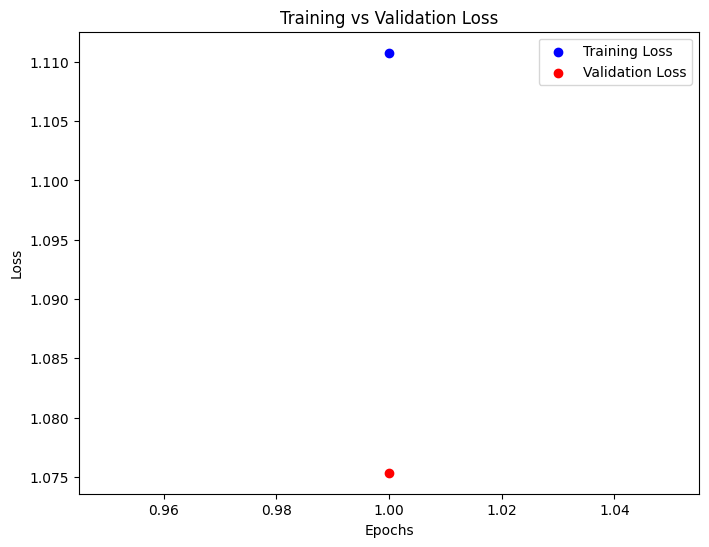

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.3364, Val Loss: 1.6019


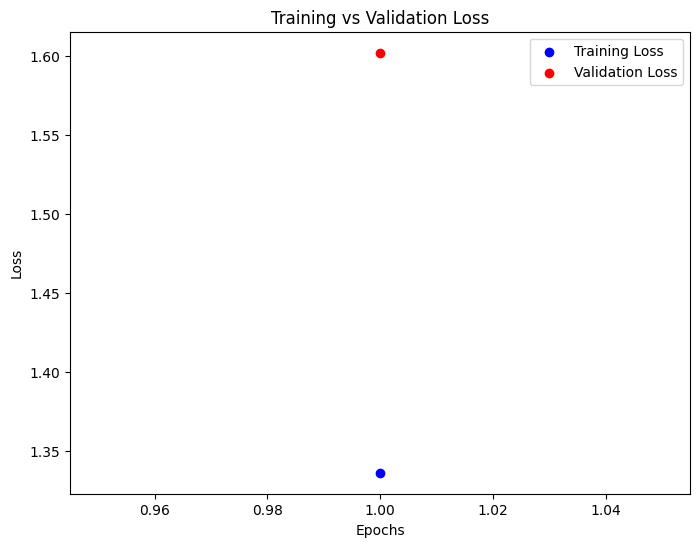

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1089, Val Loss: 1.1536
Epoch 2/5 - Train Loss: 1.1066, Val Loss: 1.1507
Epoch 3/5 - Train Loss: 1.1044, Val Loss: 1.1478
Epoch 4/5 - Train Loss: 1.1022, Val Loss: 1.1449
Epoch 5/5 - Train Loss: 1.1000, Val Loss: 1.1419


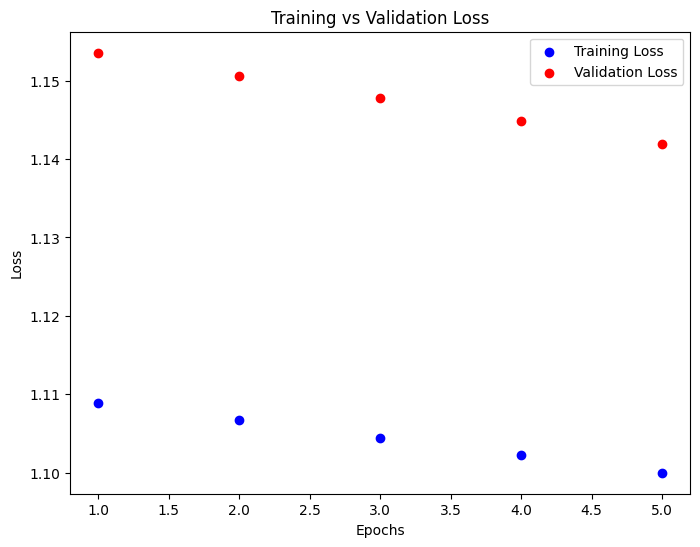

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.0330, Val Loss: 0.9212
Epoch 2/3 - Train Loss: 0.8841, Val Loss: 0.7308
Epoch 3/3 - Train Loss: 0.7659, Val Loss: 0.5998


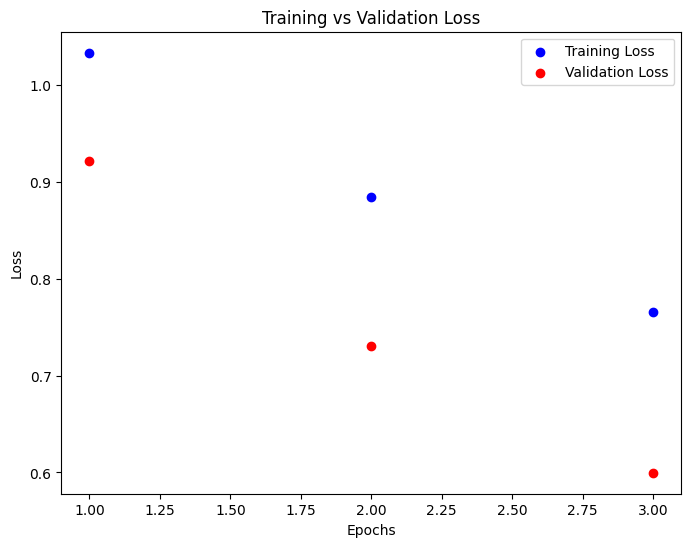

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.2874, Val Loss: 1.3586


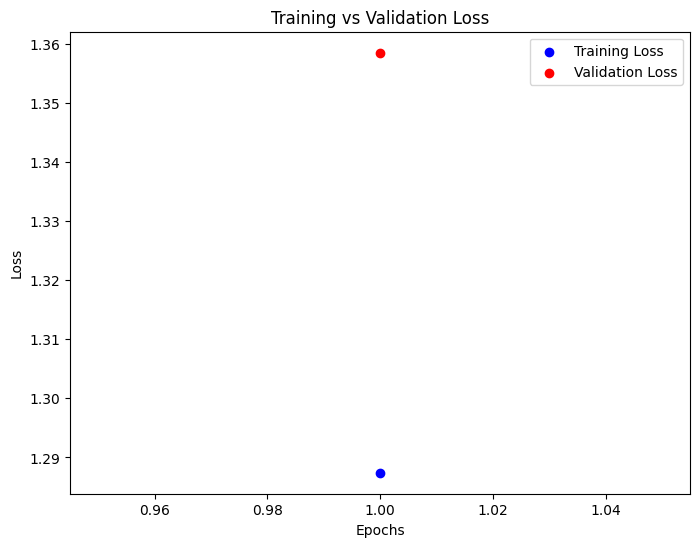

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.5829, Val Loss: 1.9858
Epoch 2/3 - Train Loss: 1.5804, Val Loss: 1.9825
Epoch 3/3 - Train Loss: 1.5781, Val Loss: 1.9788


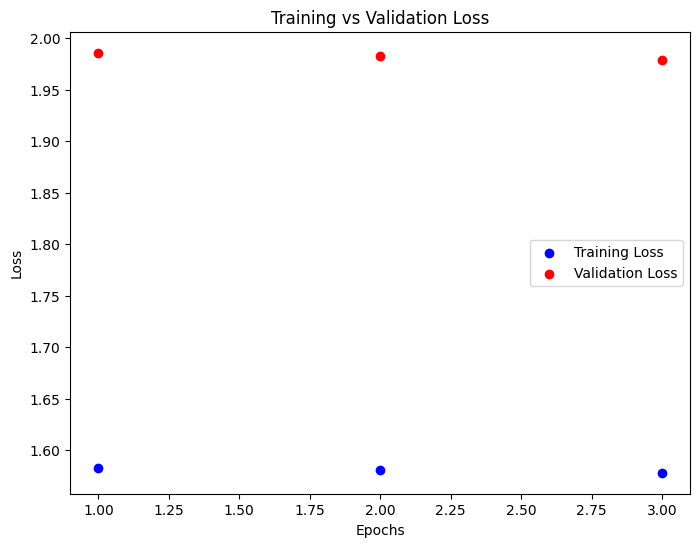

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.2031, Val Loss: 1.0944
Epoch 2/3 - Train Loss: 1.2021, Val Loss: 1.0932
Epoch 3/3 - Train Loss: 1.2011, Val Loss: 1.0920


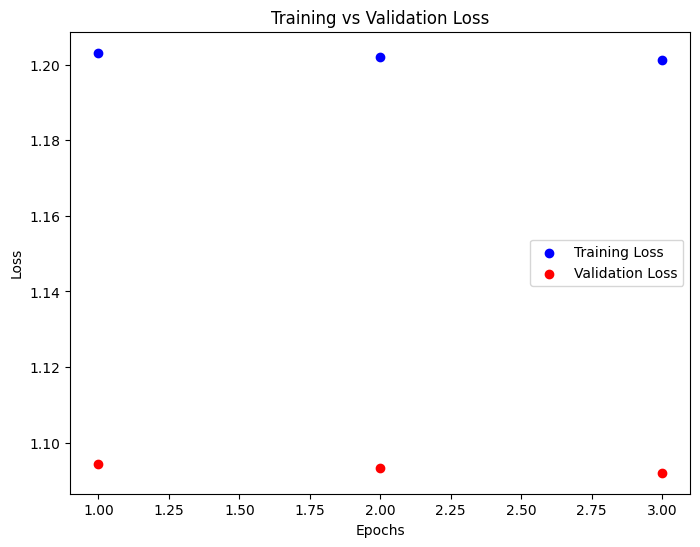

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1007, Val Loss: 0.9377
Epoch 2/5 - Train Loss: 1.0995, Val Loss: 0.9364
Epoch 3/5 - Train Loss: 1.0983, Val Loss: 0.9351
Epoch 4/5 - Train Loss: 1.0971, Val Loss: 0.9339
Epoch 5/5 - Train Loss: 1.0959, Val Loss: 0.9326


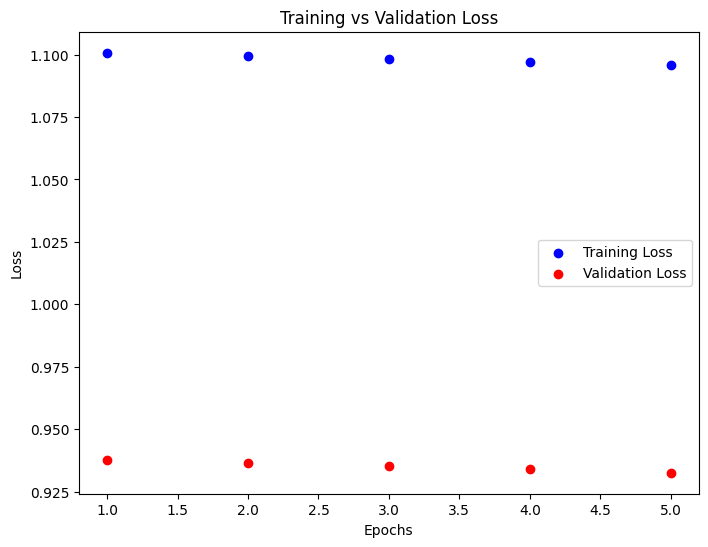

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 0.9330, Val Loss: 0.7036
Epoch 2/3 - Train Loss: 0.8562, Val Loss: 0.6289
Epoch 3/3 - Train Loss: 0.7886, Val Loss: 0.5558


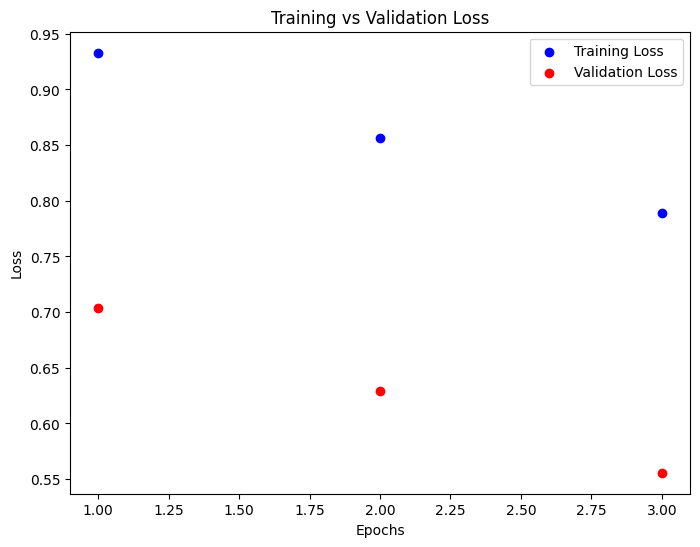

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.1110, Val Loss: 1.1952


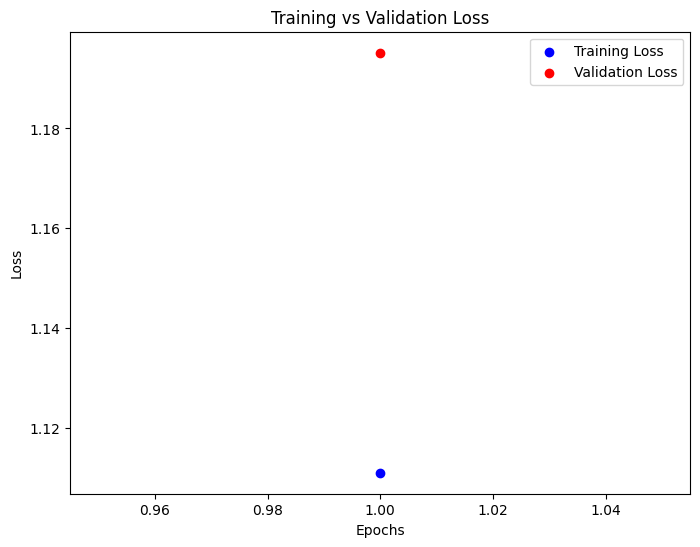

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.2605, Val Loss: 1.3452
Epoch 2/5 - Train Loss: 1.0954, Val Loss: 1.1594
Epoch 3/5 - Train Loss: 0.9661, Val Loss: 1.0112
Epoch 4/5 - Train Loss: 0.8716, Val Loss: 0.8938
Epoch 5/5 - Train Loss: 0.8031, Val Loss: 0.8082


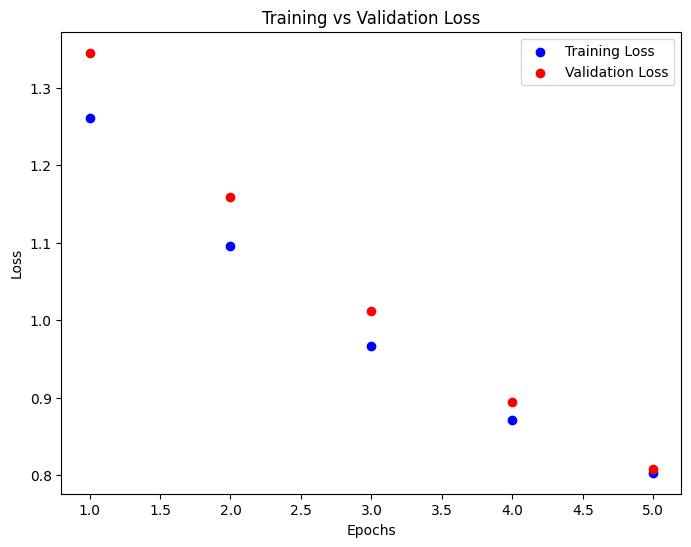

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.2427, Val Loss: 1.1661
Epoch 2/5 - Train Loss: 1.1283, Val Loss: 1.0458
Epoch 3/5 - Train Loss: 1.0354, Val Loss: 0.9273
Epoch 4/5 - Train Loss: 0.9525, Val Loss: 0.8311
Epoch 5/5 - Train Loss: 0.8814, Val Loss: 0.7526


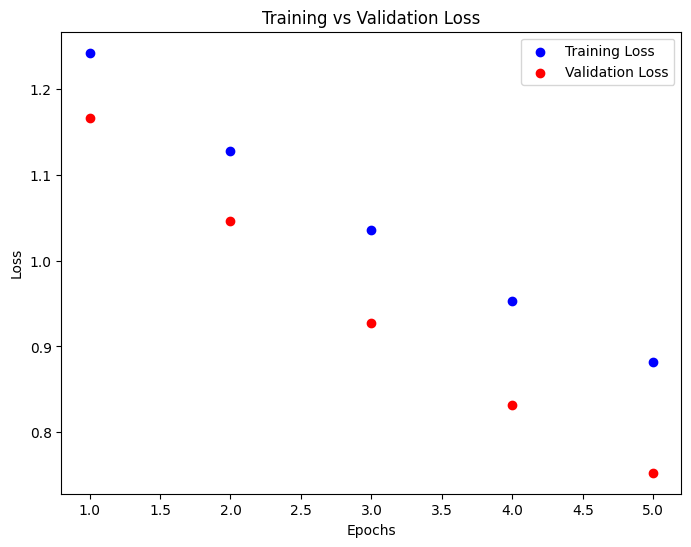

Stopping HPO due to exhausted search space: 12 of 12 possible configs ran.
Fitted model: CustomMLPClassifier/T1 ...
	0.5238	 = Validation score   (accuracy)
	1.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T2 ...
	0.1429	 = Validation score   (accuracy)
	1.02s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T3 ...
	0.1905	 = Validation score   (accuracy)
	3.17s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T4 ...
	0.6667	 = Validation score   (accuracy)
	1.97s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T5 ...
	0.0952	 = Validation score   (accuracy)
	0.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T6 ...
	0.0476	 = Validation score   (accuracy)
	1.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T7 ...
	0.3333	 = Validation score   (accuracy)
	1.15s	 =

In [32]:
random_searcher_instance = ag_searcher.LocalRandomSearcher(search_space=custom_hyperparameters[CustomMLPClassifier])

random_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "time_out": 7777777
}

random_predictor = TabularPredictor(label='target', path='models/random_search', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=random_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

# Defining random search hyperparameters
random_search_params = {
    "CustomMLPClassifier/T1": [1e-3, 1, 2],
    "CustomMLPClassifier/T2": [1e-5, 1, 2],
    "CustomMLPClassifier/T3": [1e-3, 3, 2],
    "CustomMLPClassifier/T4": [1e-5, 3, 2],
    "CustomMLPClassifier/T5": [1e-3, 5, 2],
    "CustomMLPClassifier/T6": [1e-5, 5, 2],
    "CustomMLPClassifier/T7": [1e-3, 1, 4],
    "CustomMLPClassifier/T8": [1e-5, 1, 4],
    "CustomMLPClassifier/T9": [1e-3, 3, 4],
    "CustomMLPClassifier/T10": [1e-5, 3, 4],
    "CustomMLPClassifier/T11": [1e-3, 5, 4],
    "CustomMLPClassifier/T12": [1e-5, 5, 4]
}

### Hyperband Search

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.58 GB / 12.67 GB (75.6%)
Disk Space Avail:   74.41 GB / 112.64 GB (66.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 2}
Epoch 1/1 - Train Loss: 0.9952, Val Loss: 0.8392


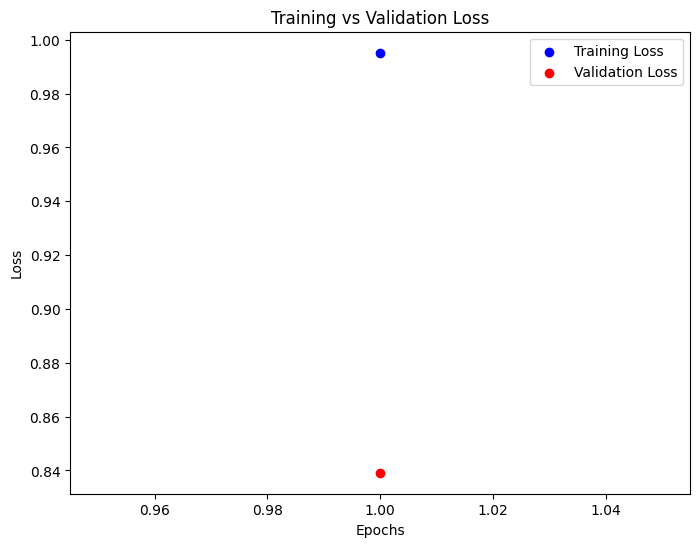

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 0.9633, Val Loss: 0.9305


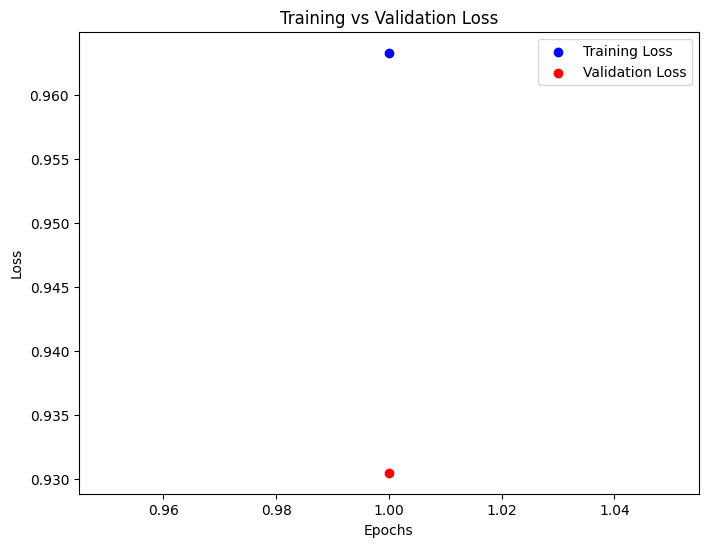

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.3134, Val Loss: 1.6634
Epoch 2/5 - Train Loss: 1.3109, Val Loss: 1.6599
Epoch 3/5 - Train Loss: 1.3085, Val Loss: 1.6566
Epoch 4/5 - Train Loss: 1.3060, Val Loss: 1.6532
Epoch 5/5 - Train Loss: 1.3037, Val Loss: 1.6496


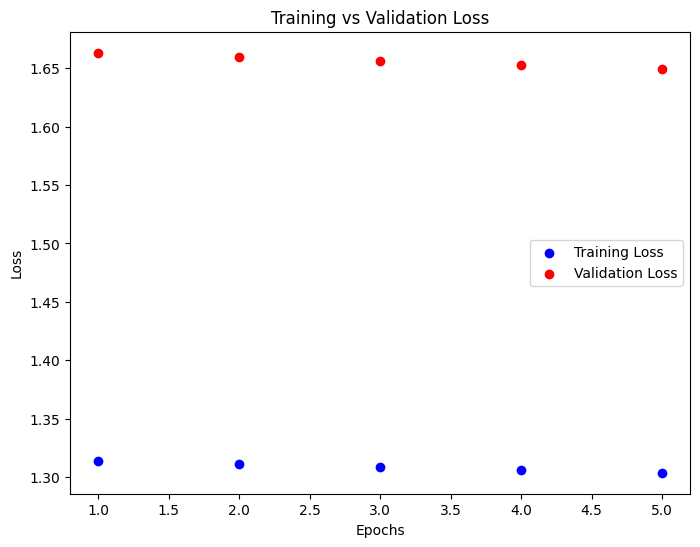

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.0307, Val Loss: 0.9994
Epoch 2/3 - Train Loss: 0.9007, Val Loss: 0.8410
Epoch 3/3 - Train Loss: 0.7974, Val Loss: 0.7116


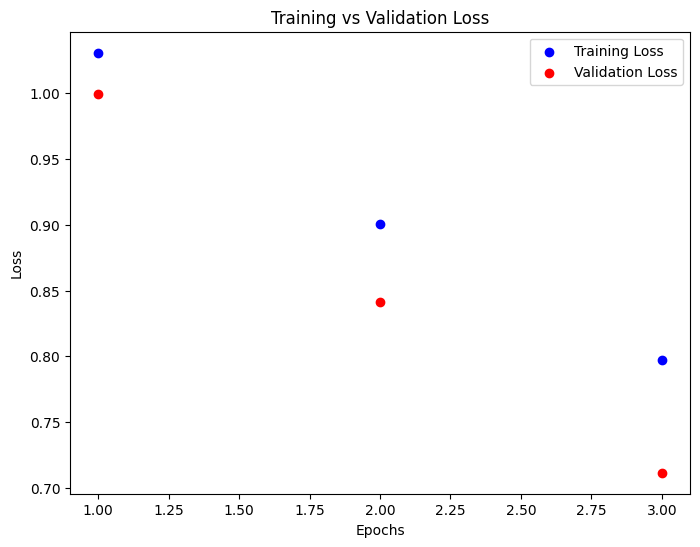

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.1893, Val Loss: 1.0761


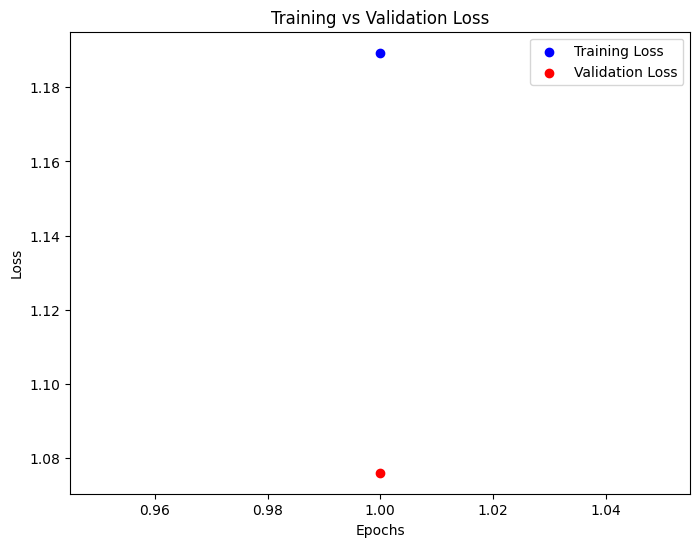

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.2444, Val Loss: 1.3922
Epoch 2/3 - Train Loss: 1.2422, Val Loss: 1.3889
Epoch 3/3 - Train Loss: 1.2400, Val Loss: 1.3855


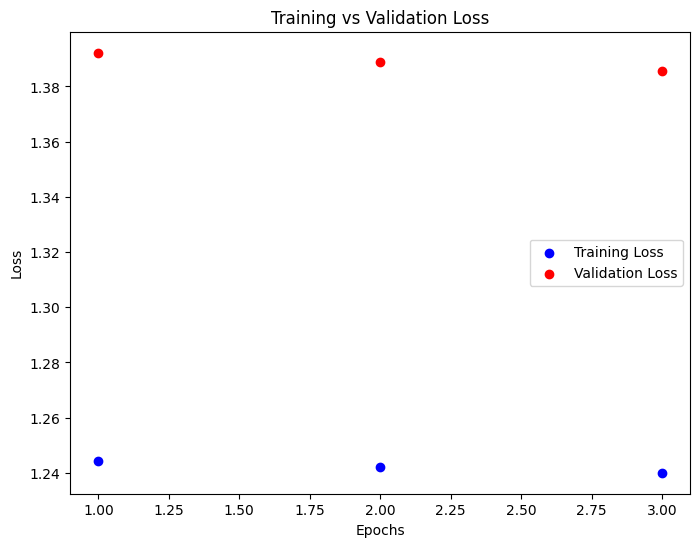

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.2152, Val Loss: 1.2888
Epoch 2/3 - Train Loss: 1.2142, Val Loss: 1.2871
Epoch 3/3 - Train Loss: 1.2131, Val Loss: 1.2857


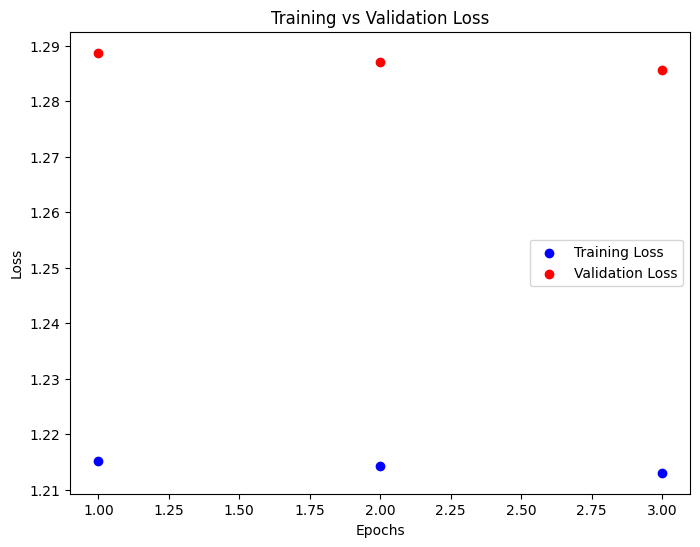

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1065, Val Loss: 0.9346
Epoch 2/5 - Train Loss: 1.1053, Val Loss: 0.9330
Epoch 3/5 - Train Loss: 1.1040, Val Loss: 0.9315
Epoch 4/5 - Train Loss: 1.1028, Val Loss: 0.9299
Epoch 5/5 - Train Loss: 1.1016, Val Loss: 0.9286


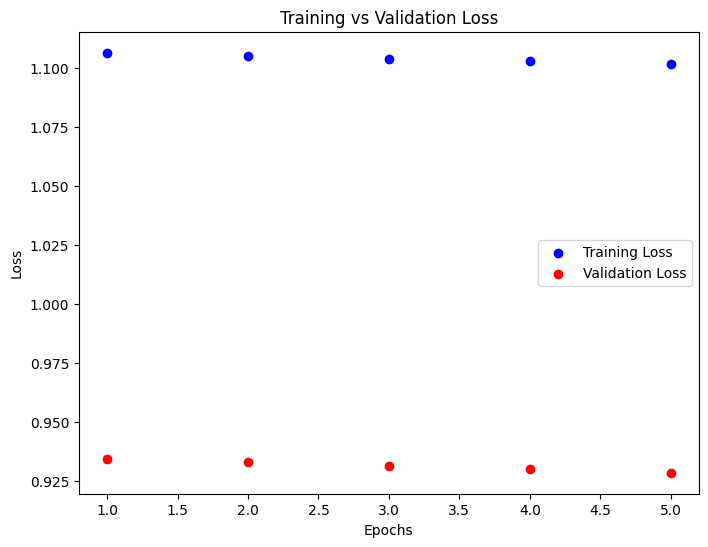

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.3720, Val Loss: 1.2667
Epoch 2/3 - Train Loss: 1.2377, Val Loss: 1.1020
Epoch 3/3 - Train Loss: 1.1193, Val Loss: 0.9586


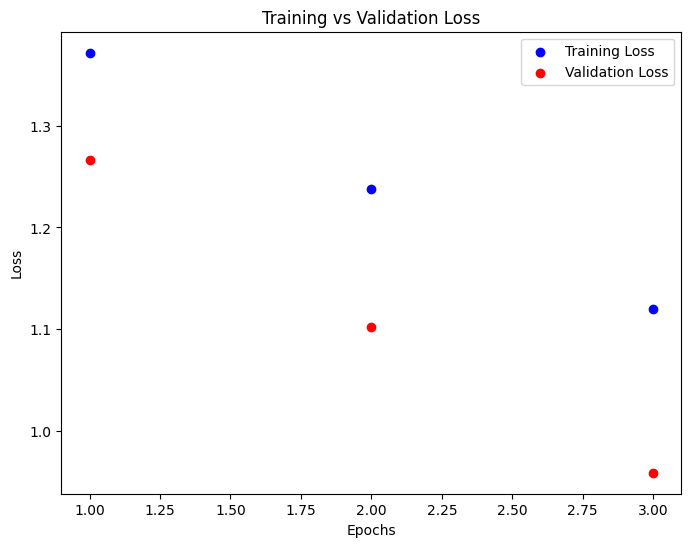

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.1135, Val Loss: 1.0032


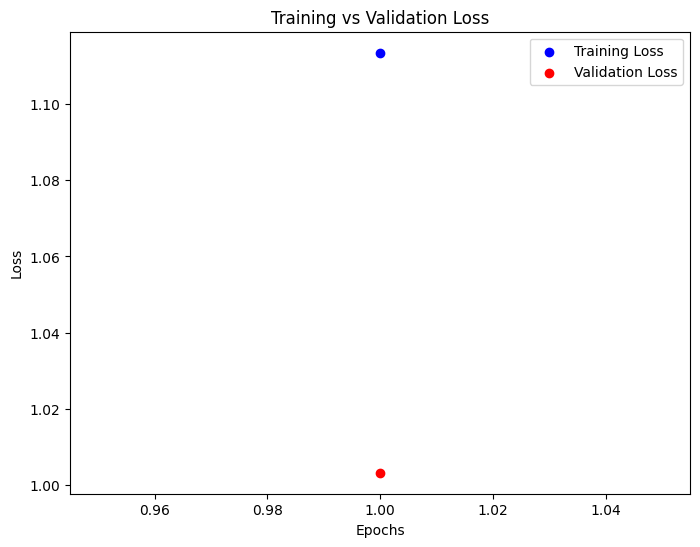

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1520, Val Loss: 1.1369
Epoch 2/5 - Train Loss: 0.9960, Val Loss: 0.9435
Epoch 3/5 - Train Loss: 0.8741, Val Loss: 0.7851
Epoch 4/5 - Train Loss: 0.7690, Val Loss: 0.6636
Epoch 5/5 - Train Loss: 0.6812, Val Loss: 0.5663


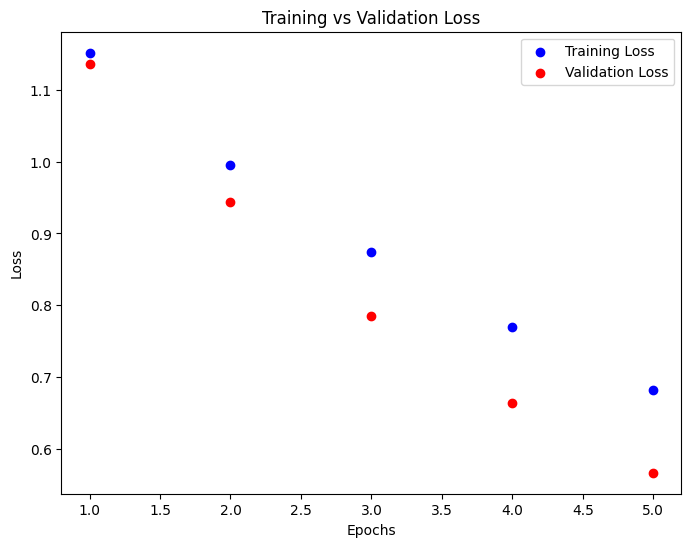

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 0.8196, Val Loss: 0.6535
Epoch 2/5 - Train Loss: 0.7502, Val Loss: 0.5748
Epoch 3/5 - Train Loss: 0.6927, Val Loss: 0.5075
Epoch 4/5 - Train Loss: 0.6437, Val Loss: 0.4553
Epoch 5/5 - Train Loss: 0.6031, Val Loss: 0.4111


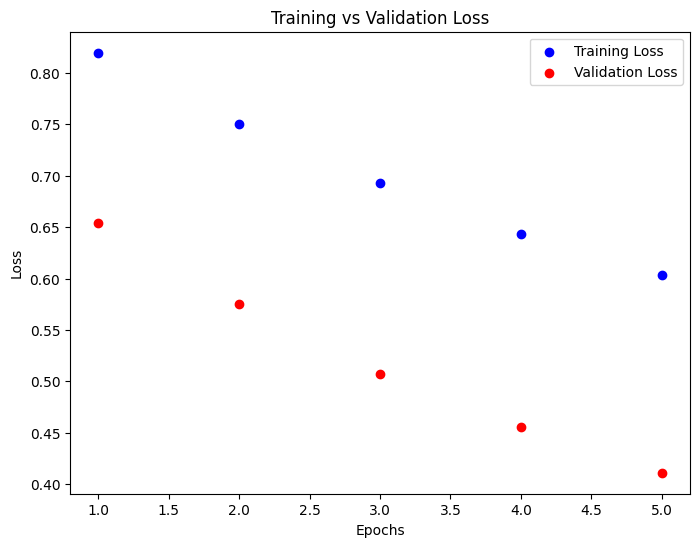

Stopping HPO due to exhausted search space: 12 of 12 possible configs ran.
Fitted model: CustomMLPClassifier/T1 ...
	0.3333	 = Validation score   (accuracy)
	2.87s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T2 ...
	0.4762	 = Validation score   (accuracy)
	0.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T3 ...
	0.2857	 = Validation score   (accuracy)
	3.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T4 ...
	0.619	 = Validation score   (accuracy)
	5.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T5 ...
	0.2857	 = Validation score   (accuracy)
	2.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T6 ...
	0.2381	 = Validation score   (accuracy)
	1.99s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T7 ...
	0.1429	 = Validation score   (accuracy)
	1.18s	 

In [33]:
hyperband_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "search_strategy": "hyperband",
    "time_out": 7777777
}

hyperband_predictor = TabularPredictor(label='target', path='models/hyperband', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=hyperband_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

# Defining hyperband search hyperparameters
hyperband_search_params = {
    "CustomMLPClassifier/T2": [1e-5, 1, 2],
    "CustomMLPClassifier/T1": [1e-3, 1, 2],
    "CustomMLPClassifier/T3": [1e-3, 3, 2],
    "CustomMLPClassifier/T4": [1e-5, 3, 2],
    "CustomMLPClassifier/T5": [1e-3, 5, 2],
    "CustomMLPClassifier/T6": [1e-5, 5, 2],
    "CustomMLPClassifier/T7": [1e-3, 1, 4],
    "CustomMLPClassifier/T8": [1e-5, 1, 4],
    "CustomMLPClassifier/T9": [1e-3, 3, 4],
    "CustomMLPClassifier/T10": [1e-5, 3, 4],
    "CustomMLPClassifier/T11": [1e-3, 5, 4],
    "CustomMLPClassifier/T12": [1e-5, 5, 4]
}

### Bayesian Search

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.55 GB / 12.67 GB (75.3%)
Disk Space Avail:   74.41 GB / 112.64 GB (66.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 2}
Epoch 1/1 - Train Loss: 1.4577, Val Loss: 1.3354


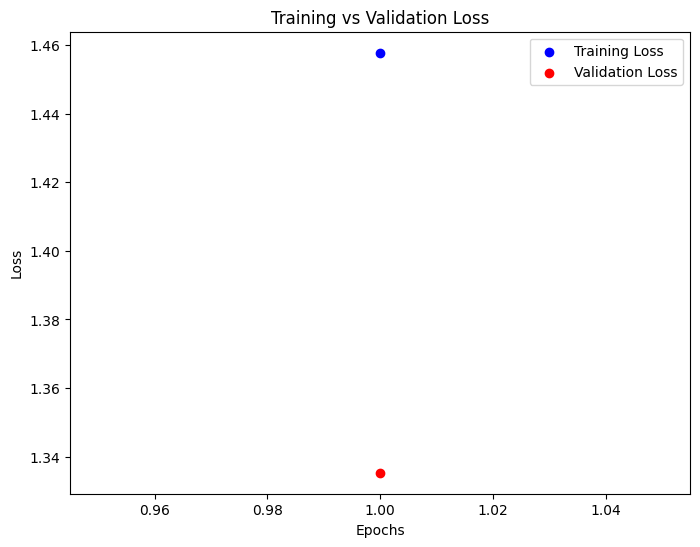

Hyperparameters: {'learning_rate': 0.001, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 0.9620, Val Loss: 1.0943


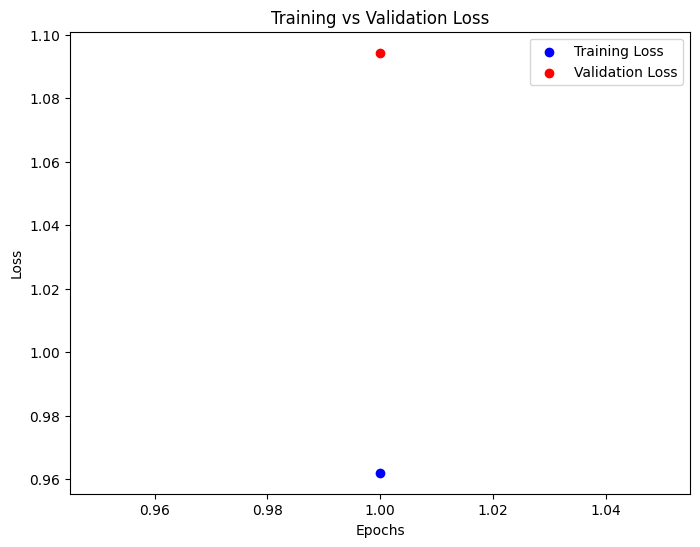

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.4520, Val Loss: 1.5615
Epoch 2/5 - Train Loss: 1.4500, Val Loss: 1.5587
Epoch 3/5 - Train Loss: 1.4481, Val Loss: 1.5560
Epoch 4/5 - Train Loss: 1.4461, Val Loss: 1.5535
Epoch 5/5 - Train Loss: 1.4442, Val Loss: 1.5507


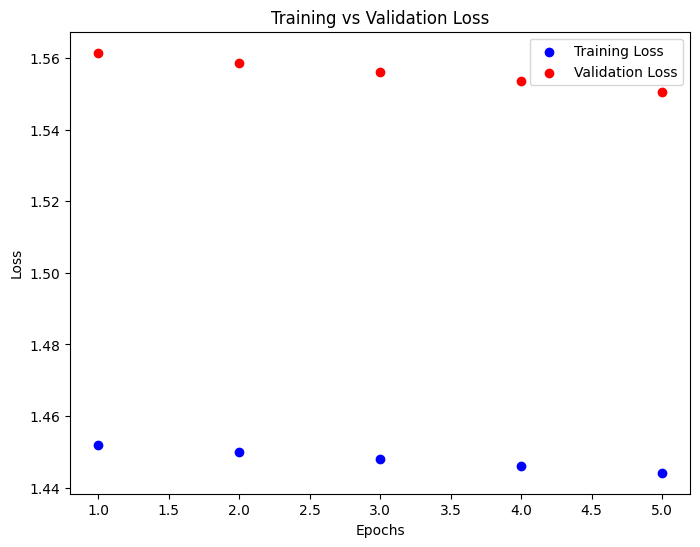

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.1233, Val Loss: 1.1645
Epoch 2/3 - Train Loss: 1.0078, Val Loss: 1.0311
Epoch 3/3 - Train Loss: 0.9167, Val Loss: 0.9058


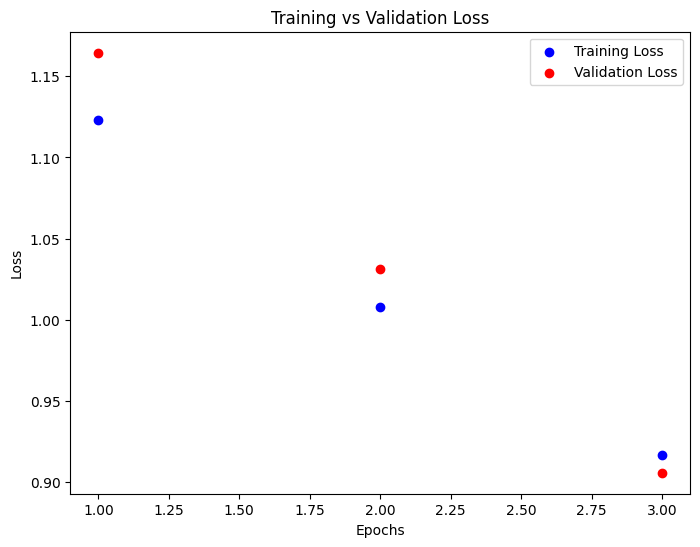

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.5634, Val Loss: 1.6180


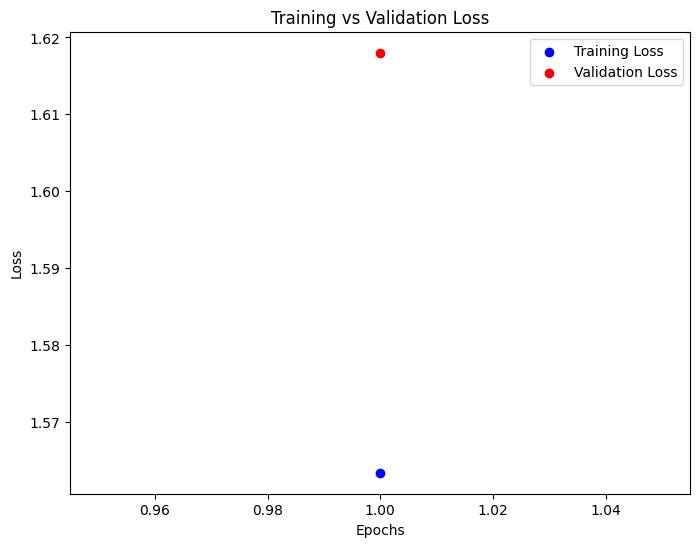

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.6621, Val Loss: 1.6733
Epoch 2/3 - Train Loss: 1.6593, Val Loss: 1.6701
Epoch 3/3 - Train Loss: 1.6564, Val Loss: 1.6670


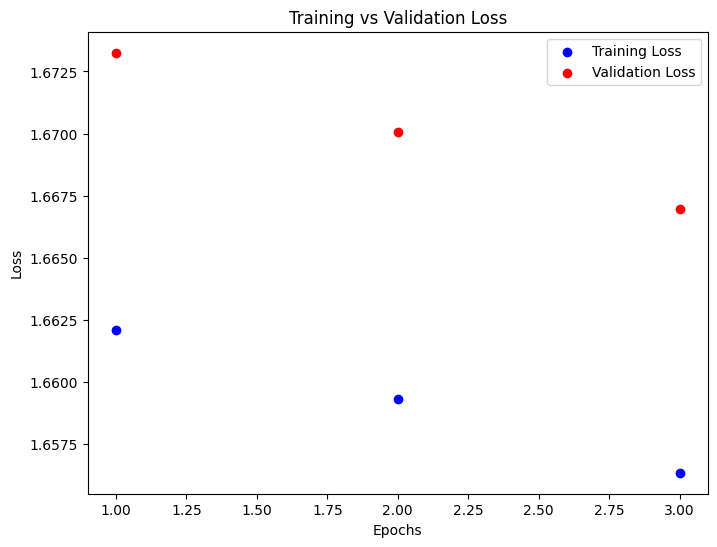

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.0672, Val Loss: 0.9272
Epoch 2/3 - Train Loss: 1.0662, Val Loss: 0.9259
Epoch 3/3 - Train Loss: 1.0652, Val Loss: 0.9248


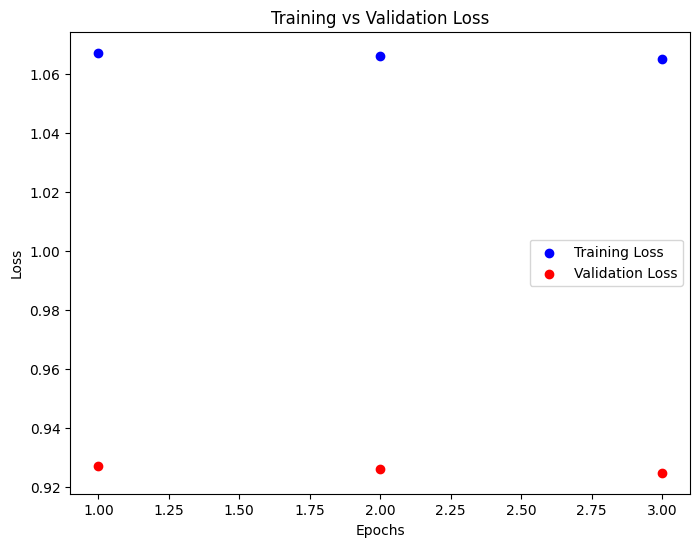

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 0.8436, Val Loss: 0.6987
Epoch 2/5 - Train Loss: 0.8427, Val Loss: 0.6976
Epoch 3/5 - Train Loss: 0.8418, Val Loss: 0.6964
Epoch 4/5 - Train Loss: 0.8408, Val Loss: 0.6954
Epoch 5/5 - Train Loss: 0.8399, Val Loss: 0.6943


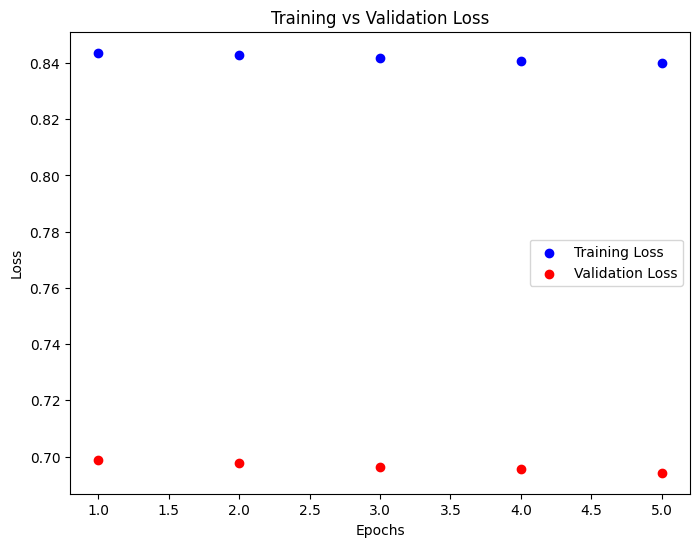

Hyperparameters: {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/3 - Train Loss: 1.2363, Val Loss: 1.2794
Epoch 2/3 - Train Loss: 1.0907, Val Loss: 1.0956
Epoch 3/3 - Train Loss: 0.9689, Val Loss: 0.9370


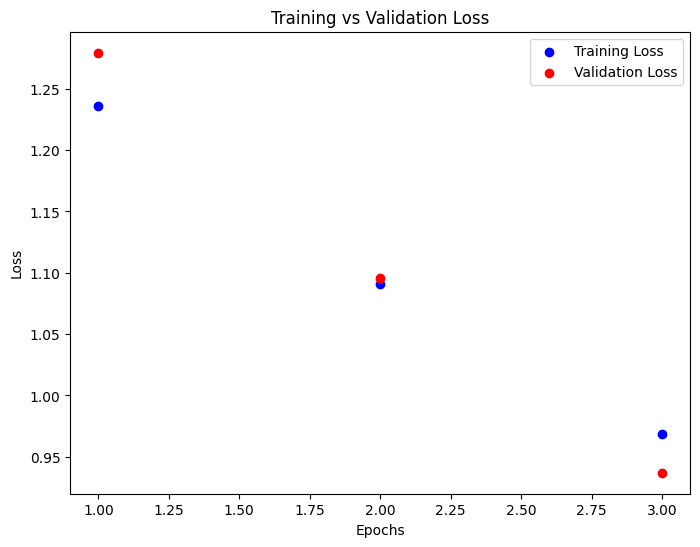

Hyperparameters: {'learning_rate': 1e-05, 'epochs': 1, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/1 - Train Loss: 1.1811, Val Loss: 1.1807


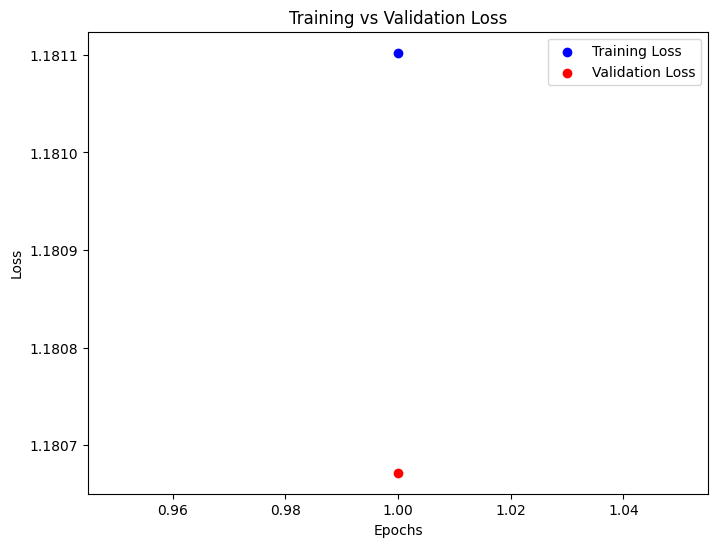

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 2}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 0.9828, Val Loss: 0.7688
Epoch 2/5 - Train Loss: 0.8678, Val Loss: 0.6464
Epoch 3/5 - Train Loss: 0.7711, Val Loss: 0.5505
Epoch 4/5 - Train Loss: 0.6934, Val Loss: 0.4724
Epoch 5/5 - Train Loss: 0.6261, Val Loss: 0.4149


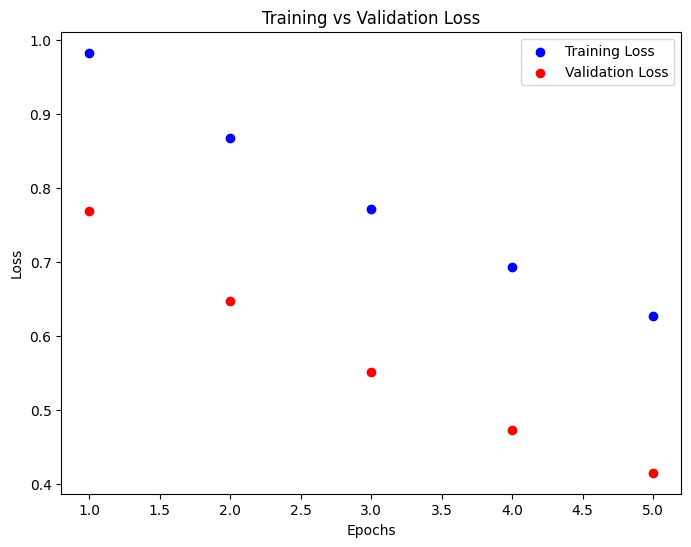

Hyperparameters: {'learning_rate': 0.001, 'epochs': 5, 'batch_size': 4}


/usr/local/lib/python3.11/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/5 - Train Loss: 1.1303, Val Loss: 1.1191
Epoch 2/5 - Train Loss: 1.0177, Val Loss: 0.9777
Epoch 3/5 - Train Loss: 0.9180, Val Loss: 0.8527
Epoch 4/5 - Train Loss: 0.8324, Val Loss: 0.7426
Epoch 5/5 - Train Loss: 0.7610, Val Loss: 0.6408


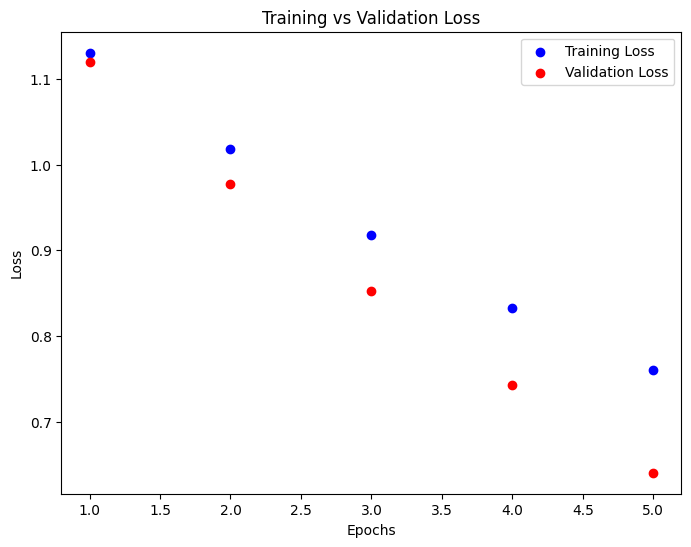

Stopping HPO due to exhausted search space: 12 of 12 possible configs ran.
Fitted model: CustomMLPClassifier/T1 ...
	0.3333	 = Validation score   (accuracy)
	0.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T2 ...
	0.4286	 = Validation score   (accuracy)
	0.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T3 ...
	0.0952	 = Validation score   (accuracy)
	3.51s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T4 ...
	0.4762	 = Validation score   (accuracy)
	2.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CustomMLPClassifier/T5 ...
	0.2381	 = Validation score   (accuracy)
	0.84s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T6 ...
	0.0476	 = Validation score   (accuracy)
	2.01s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CustomMLPClassifier/T7 ...
	0.5238	 = Validation score   (accuracy)
	1.24

In [34]:
bayesian_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "search_strategy": "bayesopt_hyperband",
    "time_out": 7777777
}

bayesian_predictor = TabularPredictor(label='target', path='models/bayesian', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=bayesian_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

# Defining bayesian search hyperparameters
bayesian_search_params = {
    "CustomMLPClassifier/T1": [1e-3, 1, 2],
    "CustomMLPClassifier/T2": [1e-5, 1, 2],
    "CustomMLPClassifier/T3": [1e-3, 3, 2],
    "CustomMLPClassifier/T4": [1e-5, 3, 2],
    "CustomMLPClassifier/T5": [1e-3, 5, 2],
    "CustomMLPClassifier/T6": [1e-5, 5, 2],
    "CustomMLPClassifier/T7": [1e-3, 1, 4],
    "CustomMLPClassifier/T8": [1e-5, 1, 4],
    "CustomMLPClassifier/T9": [1e-3, 3, 4],
    "CustomMLPClassifier/T10": [1e-5, 3, 4],
    "CustomMLPClassifier/T11": [1e-3, 5, 4],
    "CustomMLPClassifier/T12": [1e-5, 5, 4]
}

In [35]:
# Combining the different search parameters
name_to_hyperparams = {
    "grid_search": grid_search_params,
    "random_search": random_search_params,
    "hyperband_search": hyperband_search_params,
    "bayesian_search": bayesian_search_params
}

In [36]:
# Deleting unwanted models
grid_predictor.delete_models(models_to_delete='WeightedEnsemble_L2', dry_run=False)
random_predictor.delete_models(models_to_delete='WeightedEnsemble_L2', dry_run=False)
hyperband_predictor.delete_models(models_to_delete='WeightedEnsemble_L2', dry_run=False)
bayesian_predictor.delete_models(models_to_delete='WeightedEnsemble_L2', dry_run=False)

Deleting model WeightedEnsemble_L2. All files under /content/models/grid_search/models/WeightedEnsemble_L2 will be removed.
Deleting model WeightedEnsemble_L2. All files under /content/models/random_search/models/WeightedEnsemble_L2 will be removed.
Deleting model WeightedEnsemble_L2. All files under /content/models/hyperband/models/WeightedEnsemble_L2 will be removed.
Deleting model WeightedEnsemble_L2. All files under /content/models/bayesian/models/WeightedEnsemble_L2 will be removed.


In [40]:
Results = []
search_strategies = {"grid_search":grid_predictor, "random_search":random_predictor, "hyperband_search":hyperband_predictor, "bayesian_search":bayesian_predictor}
for search_strategy in list(search_strategies.keys()):
    predictor = search_strategies[search_strategy]
    for model in predictor.model_names():
        hparams = name_to_hyperparams[search_strategy].get(model, ["na", "na", "na"])
        predictions = predictor.predict(test_df, model=model)
        true_labels = test_df['target']
        acc = accuracy_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions, average='weighted')
        Results.append({'model_name': model, 'lr': hparams[0], 'epochs': hparams[1], 'batch_size': hparams[2], 'strategy': search_strategy, 'accuracy': acc, 'f1-score': f1})

In [41]:
Results = pd.DataFrame(Results)
Results = Results.sort_values(by=['strategy', 'accuracy'], ascending=[True, False])
Results

,model_name,lr,epochs,batch_size,strategy,accuracy,f1-score
44,CustomMLPClassifier/T9,0.00100,3,4,bayesian_search,0.800000,0.791097
47,CustomMLPClassifier/T12,0.00001,5,4,bayesian_search,0.733333,0.648621
46,CustomMLPClassifier/T11,0.00100,5,4,bayesian_search,0.700000,0.593548
42,CustomMLPClassifier/T7,0.00100,1,4,bayesian_search,0.666667,0.563875
43,CustomMLPClassifier/T8,0.00001,1,4,bayesian_search,0.633333,0.567521
39,CustomMLPClassifier/T4,0.00001,3,2,bayesian_search,0.600000,0.557731
37,CustomMLPClassifier/T2,0.00001,1,2,bayesian_search,0.433333,0.335304
40,CustomMLPClassifier/T5,0.00100,5,2,bayesian_search,0.300000,0.266667
45,CustomMLPClassifier/T10,0.00001,3,4,bayesian_search,0.300000,0.209662
36,CustomMLPClassifier/T1,0.00100,1,2,bayesian_search,0.266667,0.126316


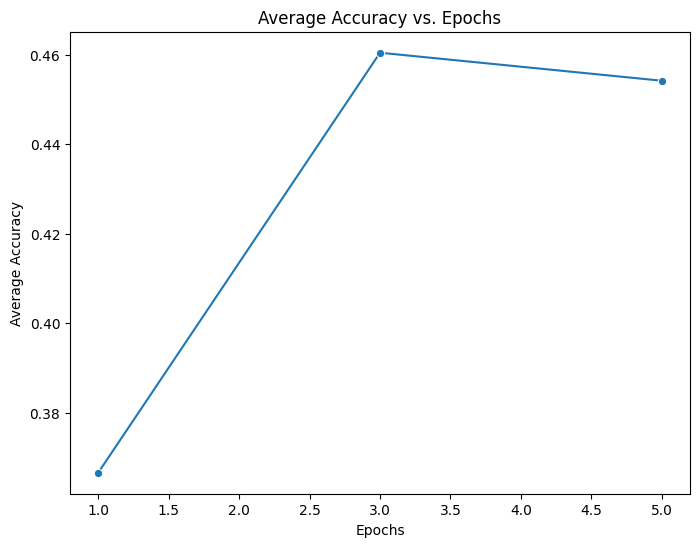

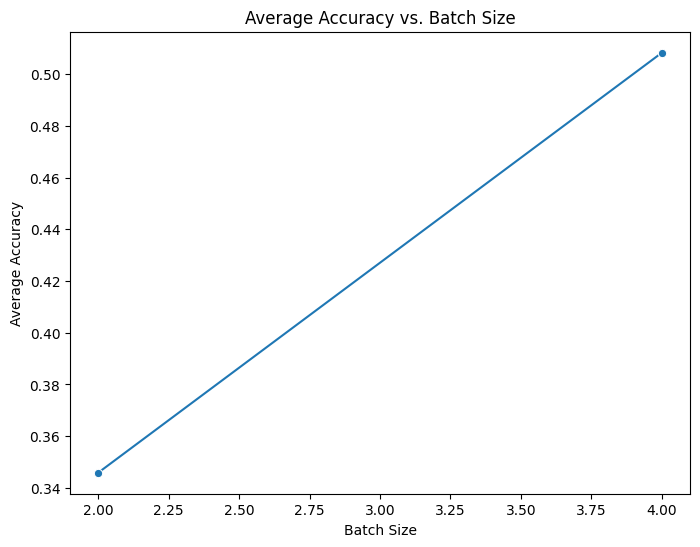

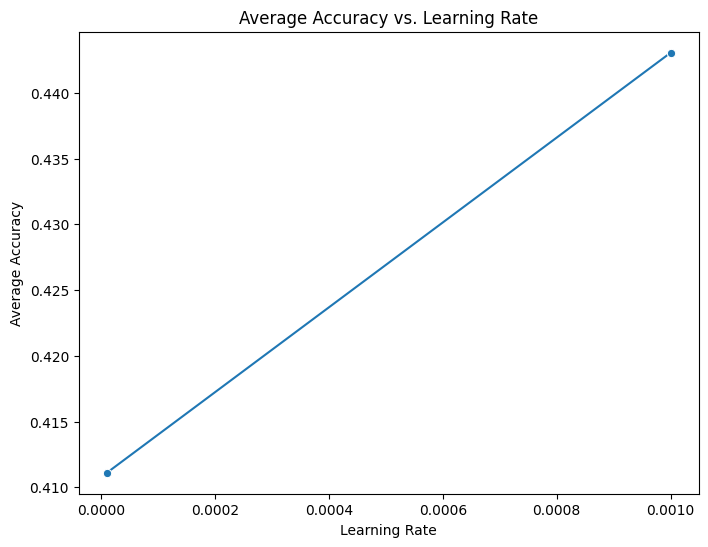

In [47]:
# Average Accuracy vs. Epochs
epochs_group = Results.groupby('epochs')['accuracy'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='epochs', y='accuracy', data=epochs_group, marker='o')
plt.title("Average Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Accuracy")
plt.show()

# Average Accuracy vs. Batch Size
batch_group = Results.groupby('batch_size')['accuracy'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='batch_size', y='accuracy', data=batch_group, marker='o')
plt.title("Average Accuracy vs. Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Average Accuracy")
plt.show()

# Average Accuracy vs. Learning Rate
lr_group = Results.groupby('lr')['accuracy'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='lr', y='accuracy', data=lr_group, marker='o')
plt.title("Average Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Average Accuracy")
plt.show()

### Relation between hyperparameters and impact on performance
1. Learning Rate:
For small values, increasing the learning rate generally improves performance because the model makes larger updates and converges faster. However, if the learning rate becomes too high, the model may overshoot the optimal point (minima) and diverge, leading to bad performance.

2. Epochs:
Increasing the number of epochs typically improves performance since the model sees the training data more times, allowing it to learn the underlying patterns better but very high number of epochs can eventually lead to overfitting.

2. Batch Size:
Batch size is often inversely related to performance: using a smaller batch size tends to improve performance because it introduces more noise into the gradient estimates, which can help the model escape local minima and generalize better. In contrast, a larger batch size produces more stable but less frequent updates, which can sometimes lead to poorer generalization and lower performance. But, as the dataset here is small, a reverse trend is seen.

### Mannual Tuning vs Automated Search
Which is better approach?
- Manual tuning uses better intuition/guess to adjust hyperparameters quickly.
- Automated search systematically explores the hyperparameter space, potentially finding better combination but at higher computation cost.
- The optimal approach depends on expertise and resources: limited compute may favor manual tuning, while abundant compute can make automated search more robust.